# Customer Personality Analysis | Kundensegmentierung mit Python

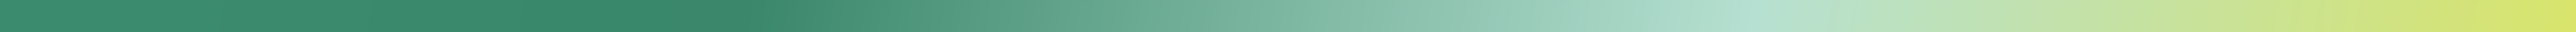

<img src="https://cdn.dribbble.com/users/1206528/screenshots/5483634/media/1d56e00defd73aaa209ffd35a1d171be.gif" width="500"/>

**"Unser Ziel sind glückliche & zufriedene Kunden!":** Viele Unternehmen verlassen sich heutzutage auf gezieltes Marketing, um ihre Kundschaft glücklich zu machen. Dies verschafft Unternehmen eine bessere Möglichkeit, ihren Kundenstamm zu halten beziehungsweise stetig auszubauen. Tech-Giganten wie Google, Meta Platforms (Facebook) & Co. haben ihre Geschäftsmodelle unter anderem rund um gezielte Werbung aufgebaut und verdienen damit hunderte Milliarden US-Dollar im Jahr [1]. Die `Customer Personality Analysis` ist dabei eine wertvolle Methode zur Identifikation der verschiedenen Kundengruppen eines Unternehmens. Dabei werden Daten zu unterschiedlichen Kundenmerkmalen herangezogen, um die Gewohnheiten und Vorlieben der Kundschaft zu verstehen und zu analysieren. Die Daten umfassen Merkmale wie Alter, Bildungsgrad, Familienstand, Kinder im Haushalt, Einkommen, die Höhe der Ausgaben für verschiedene Produkte und die Reaktion auf Rabattaktionen oder Marketingkampagnen. Diese Projektarbeit beschäftigt sich konkret mit einer Kundensegmentierung. Es werden also Kundendaten herangezogen, bereinigt und vorverarbeitet, um darauf ein Clustering-Modell aufzubauen. Etwaige Erkenntnisse werden aus dem Clustering abgeleitet und bewertet. Die Analyse wird durch hilfreiche Visualisierungen ergänzt. Dieses Projekt soll letztendlich dabei unterstützen, die Kundschaft auf der Grundlage von Verhaltensweisen, Gewohnheiten, Bedürfnissen und Interessen gezielter, also individueller anzusprechen, um damit einen Mehrwert zu erzeugen.

## Inhaltsverzeichnis
* [1. Problemdefinition & Zielsetzung](#1. Problemdefinition & Zielsetzung)
* [2. Data Collection](#2. Data Collection)
* [3. Get to know the Data](#3. Get to know the Data)
    * [3.1 Daten sichten](#3.1 Daten sichten)
    * [3.2 Daten bereinigen](#3.2 Daten bereinigen)
    * [3.3 Daten transformieren](#3.3 Daten transformieren)
* [4. Modelling](#4. Modelling)    
    * [4.1 Modellauswahl](#4.1 Modellauswahl)
    * [4.2 Modell aufsetzen](#4.2 Modell aufsetzen)
    * [4.3 Modell trainieren](#4.3 Modell trainieren)
* [5. Ergebnisdokumentation & Schlussbetrachtungen](#5. Ergebnisdokumentation & Schlussbetrachtungen)    
    * [5.1 Ergebnisse](#5.1 Ergebnisse)
    * [5.2 Limitationen & Ausblick](#5.2 Limitationen & Ausblick)
    * [5.3 Fazit](#5.3 Fazit)
* [6. Quellenangaben](#6. Quellenangaben)

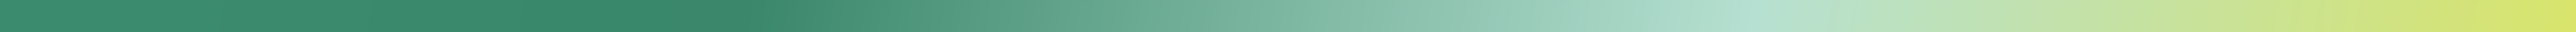

## 1. Problemdefinition & Zielsetzung <a class="anchor" id="1. Problemdefinition & Zielsetzung"></a>

Checkliste für den Abschnitt "Problemdefinition & Zielsetzung":

- [x] Einleitung in das Projekt
- [x] Darstellung des zugrundeliegenden Problems
- [x] Erläuterung des Ziels der Datenanalyse
- [x] Beschreibung von Struktur und Bewertungskriterien der Datenanalyse

Die `Analyse der Kundenpersönlichkeiten` ist eine detaillierte Analyse der idealen Kunden eines Unternehmens. Sie hilft einem Unternehmen, seine Kunden besser zu verstehen und erleichtert die Anpassung von Produkten an die spezifischen Bedürfnisse, Verhaltensweisen und Anliegen der verschiedenen Kundentypen. Indem bspw. ein Unternehmen analysiert, welches Kundensegment das Produkt am ehesten kaufen würde und diese Kunden gezielt anspricht, kann ein Unternehmen im Vergleich zur der Vermarktung des Produktes an alle in der Datenbank befindlichen Kunden die Marketingkosten erheblich reduzieren.

In diesem Projekt werde ich eine Methode des unsupervised learning (Clustering) verwenden, um aus Kundendaten einer Datenbank eines Unternehmens wertvolle Erkenntnisse zu den Kunden zu extrahieren. Unter Clustering oder auch Kundensegmentierung versteht man die Einteilung von Kunden in Gruppen, in welcher die einzelnen Kunden Ähnlichkeiten untereinander aufweisen. Ich werde die Kunden in Segmente unterteilen, um die Produkte entsprechend den unterschiedlichen Bedürfnissen und Verhaltensweisen der Kunden anzupassen. Außerdem soll es dem Unternehmen letztendlich helfen, auf die Belange der verschiedenen Kundentypen sinnvoll einzugehen.

Für die Datenanalyse werden eine Reihe von Libraries und Packages auf der Basis von Python genutzt, die die Analyse vereinfachen. Nachfolgend werden die verwendeten Packages und Versionsnummern jeweils mit kurzer Beschreibung des Verwendungszweckes tabellarisch aufgeführt:

| Package  | Versionsnummer | Zweck |
|:--|:-:|:--|
| [Pandas](https://pandas.pydata.org/docs/) | 1.4.2 | Grundlegendes Package zur Manipulation und Transformation der Datensets |
| [Seaborn](https://seaborn.pydata.org/) | 0.11.2 | Package basierend auf Matplotlib für schnelle Visualisierungen von Daten  |
| [NumPy](https://numpy.org/) | 1.22.3 | Python-Bibliothek, die ein mehrdimensionales Array-Objekt, verschiedene abgeleitete Objekte (z. B. maskierte Arrays und Matrizen) und eine Reihe von Routinen für schnelle Operationen auf Arrays bereitstellt |
| [Matplotlib](https://matplotlib.org/) | 3.5.1 | Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python |
| [Scipy](https://www.scipy.org/) | 1.7.3 | Das SciPy-Ökosystem umfasst allgemeine und spezielle Tools für die Datenverwaltung und -berechnung, produktive Experimente und Hochleistungsberechnungen |
| [Sklearn](https://scikit-learn.org/stable/) | 1.1.1 | Einfache und effiziente Tools für die prädiktive Datenanalyse |

Im nächsten Schritt werden die Pakete in die Umgebung (Jupyter Notebook - Anaconda Navigator Environment) importiert.

In [1]:
# Prüfen, ob Python Packages installiert sind in der verwendeten Umgebung
import sys
import importlib.util
%matplotlib inline
%load_ext autoreload
%autoreload

packages = ["pandas", "seaborn", "numpy", "matplotlib", "scipy", "sklearn"]

for name in packages:
    try:
        __import__(name)
    except ImportError:
        print(name)
        !pip.main(["install", package])

In [2]:
# Importieren der relevanten & hilfreichen Python-Pakete

import pandas as pd
import numpy as np
import seaborn as sns
from IPython import display
from datetime import date

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px
from scipy import stats
import sklearn

import warnings
warnings.filterwarnings('ignore')

print('Pandas:', pd.__version__)
print('NumPy:', np.__version__)
print('Seaborn:', sns.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Sklearn:', sklearn.__version__)

Pandas: 1.4.2
NumPy: 1.22.3
Seaborn: 0.11.2
Matplotlib: 3.5.1
Sklearn: 1.1.1


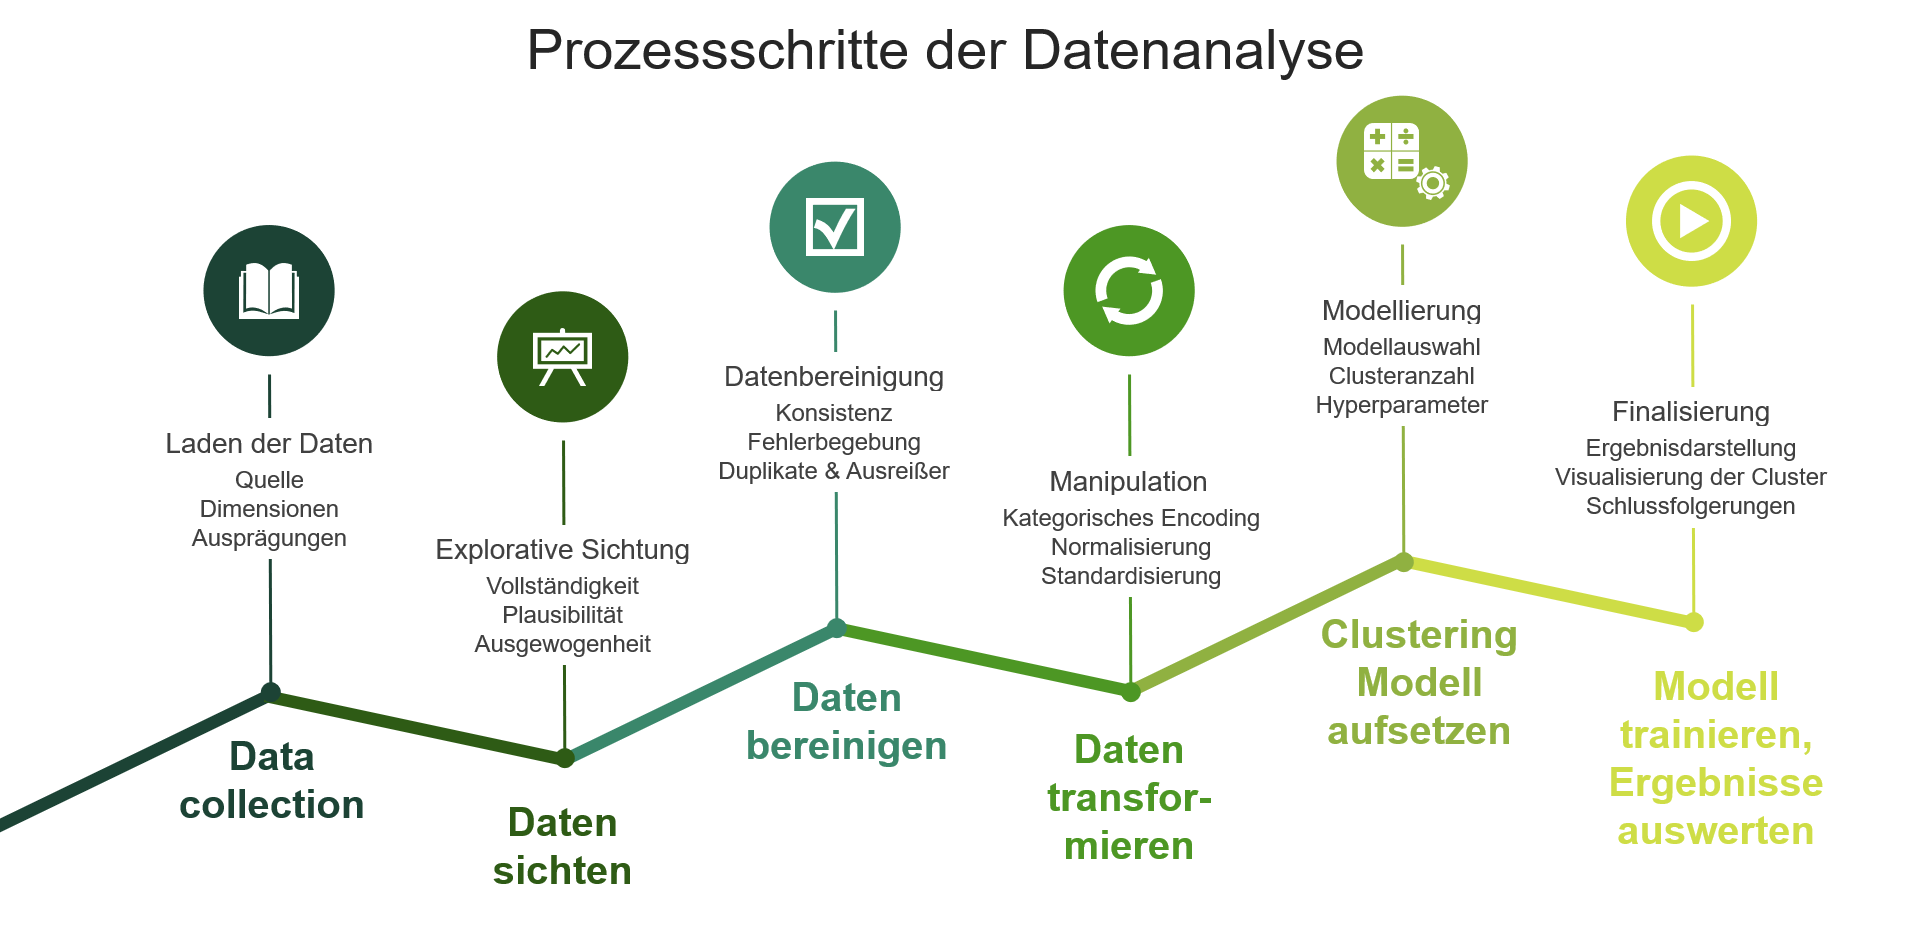

In [3]:
display.Image("./misc/DA_project_process.png")

Der in den Datenwissenschaften gut etablierte **CRISP-DM Prozess** [2] wird dem Prozessablauf dieser Arbeit ebenfalls zugrunde gelegt. Dabei wird in diesem Projekt den Schritten vom Geschäftsverständnis, über das Datenverständnis, der Datenaufbereitung, der Modellierung, der Modellbewertung sowie dem finalen Deployment gefolgt. Der iterative Ansatz hinter CRISP-DM wird dabei mitberücksichtigt. Der CRISP-DM Prozess spiegelt sich in der Gliederung dieser Projektarbeit wider.

In diesem Projekt werden zum Teil austauschbare Begrifflichkeiten verwendet. Diese sind zudem naturgemäß regelmäßig in englischer Sprache vorhanden. Für das Verständnis des Lesers nachfolgend ein paar wenige Definitionen:

| Begriffe  | Bedeutung |
|:--|:--|
| Dataset, Datentabelle | Gesamter Datenbestand (in diesem Fall eine csv-Datei) |
| Dataframe | Gesamten Datenbestand als Tabelle in Pandas |
| Datensatz | Eine Zeile in der Datentabelle |
| Dimension, Feature, Merkmal | Eine Variable (Spalte) in der Datentabelle |

In diesem Projekt wird ein **K-means-Algorithmus** [3] verwendet. Als **Bewertungskriterium** für die Güte des Clustering wird das Kriterium der Trägheit (Inertia) bzw. die Quadratsumme der euklidischen Abstände zum Clustermittelpunkt (Centroid) betrachtet. Letzterer soll innerhalb der Cluster minimiert werden, ohne dabei zu viele Cluster zu bilden. Weiterhin kann zur Bewertung der Qualität eines Clusterings der sog. "Silhouette Score" [4] aufschlussreich sein.

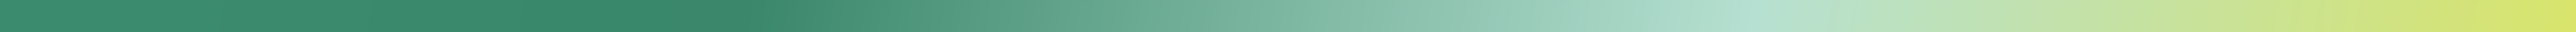

## 2. Data Collection <a class="anchor" id="2. Data Collection"></a>

Checkliste für den Abschnitt "Data Collection":

- [x] Laden des Datasets und erste Informationen
- [x] Erläuterung der Quelle des Datasets
- [x] Beschreibung der Dimensionen des Datasets

**Laden des Datasets und erste Erläuterungen:**

In [4]:
# Daten werden so geladen, dass die Daten sofort in Spalten aufgeteilt wurden (siehe dazu sep "\t" als seperator).
# Das Ergebnis ist der für dieses Projekt verwendete "marketing" dataframe

marketing = pd.read_csv(r"src/marketing_campaign.csv", sep="\t")

**Zum Dataset:**

 > Das Dataset [5] für dieses Projekt wurde freundlicherweise von Dr. Omar Romero-Hernandez im Rahmen einer CC0: Public Domain Lizenz auf kaggle.com zur Verfügung gestellt.

In [5]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Erkenntnisse aus dem ersten Überblick:

- Alle Spalten bis auf `Income` scheinen vollständig zu sein (jeweils 2240 non-null Werte).
- Die vorhandenen Datentypen in den Spalten sind vom Typ integer, float oder object.
- Das Feature `Dt_Customer` zeigt das Datum, an welchem ein Kunde erstmalig eine Bestellung getätigt hat. Der Datentyp "object" ist nicht ideal und wird im weiteren Verlauf der Datentransformation zu "datetime" geändert.

**So viel für die erste Inaugenscheinnahme. Weitere Details und Beobachtungen folgen in den nächsten Kapiteln.**

Nach genauerer Analyse der einzelnen Dimensionen des Dataframes sowie der Informationen aus der Quelle des Datensets, lässt dieser sich in die folgenden *vier Oberkategorien* aufteilen: 

> 1. People, 2. Products, 3. Promotion, 4. Place

Die nachfolgende Grafik veranschaulicht die einzelnen Dimensionen/Features des Dataframes und nimmt zudem jeweils eine Zuordnung zu den genannten Oberkategorien vor.

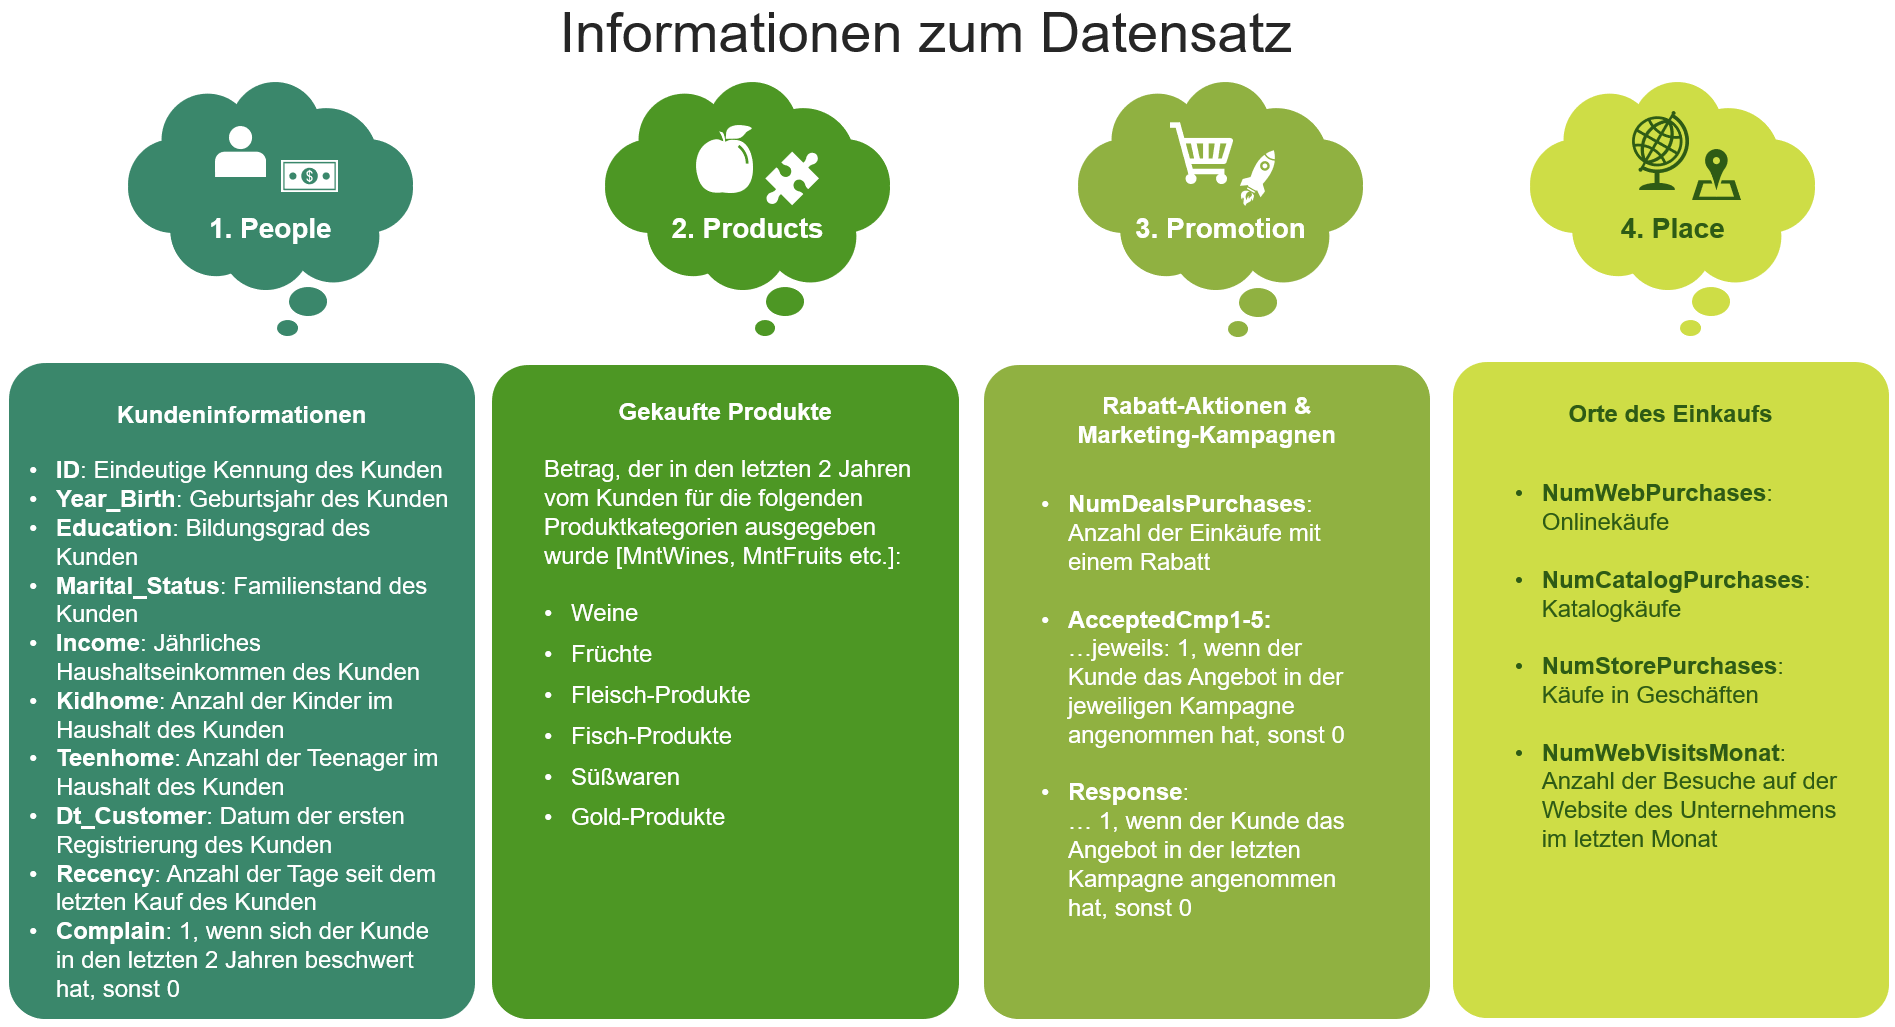

In [7]:
display.Image("./misc/DA_project_df_infos_2.png")

Die folgende Analyse wird sich damit beschäftigen, wie die einzelnen Features strukturiert, vereinheitlicht und verknüpft werden können, um darauf eine Segmentierung der Kunden aufzubauen. Es werden die persönlichen Merkmale (z.B. `Age`, `Income`, `Marital status`, `Kidhome`), gekaufte Produkte nach Kategorie und das Kaufverhalten (z.B. `NumDealsPurchases`, `AcceptedCmp`) analysiert. Zudem wird der Einkaufsort betrachtet (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`) und geprüft, inwiefern der Einkaufsort Erkenntnisse für die Kundenanlyse liefert.

<div class="alert alert-block alert-success">
<b>Zusammenfassung:</b><br>
- Der Datensatz wurde erfolgreich geladen, die Quelle gecheckt, sich ein erster Überblick verschafft und die Dimensionen des Datensatzes wurden analysiert und erklärt.  <br>
    </div>

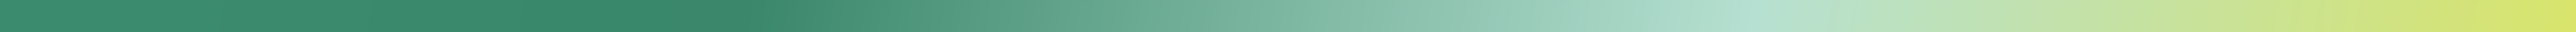

## 3. Get to know the Data <a class="anchor" id="3. Get to know the Data"></a>

### 3.1 Daten sichten <a class="anchor" id="3.1 Daten sichten"></a>

Checkliste für den Unterabschnitt "Daten sichten":

- [x] Exporative Sichtung der Daten und statistische Maßzahlen (Min, Max, Mean...)
- [x] Analyse von Datentypen, fehlenden Werten, Duplikaten und der kategorialen Variablen
- [x] Verteilung und Ausgewogenheit der Daten 
- [x] Korrelationen in den Daten werden nach der Datentransformation betrachtet

In [8]:
# Ansicht der Form/Struktur des Dataframes
print(
    f"Der Dataframe teilt sich in {marketing.shape[0]} Zeilen und {marketing.shape[1]} Spalten auf.")

Der Dataframe teilt sich in 2240 Zeilen und 29 Spalten auf.


In [9]:
# Ausgeben eines zufälligen Samples von 10 Zeilen aus dem Dataframe für den Überblick
marketing.sample(10).style.background_gradient(cmap='Greens')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
830,4887,1976,PhD,Divorced,55412.000000,1,1,22-11-2013,65,10,5,28,11,1,8,1,2,0,3,5,0,0,0,0,0,0,3,11,0
317,9478,1985,Graduation,Single,66503.000000,1,0,14-08-2012,30,91,64,128,65,3,50,2,4,3,6,3,0,0,0,0,0,0,3,11,0
874,7631,1978,Master,Together,61346.000000,1,0,06-10-2013,34,562,58,168,43,16,142,1,5,7,10,3,0,0,0,0,0,0,3,11,0
1692,10790,1985,PhD,Married,18169.000000,1,0,19-02-2013,40,9,0,5,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,0
1629,3276,1976,2n Cycle,Together,36301.000000,1,0,25-10-2013,53,11,12,35,3,5,12,1,3,0,3,7,0,0,0,0,0,0,3,11,0
487,5562,1974,Graduation,Married,60093.000000,0,1,26-06-2013,92,502,12,109,16,6,90,2,7,2,10,6,0,0,0,0,0,0,3,11,0
953,5048,1971,PhD,Single,42767.000000,2,0,11-05-2013,53,20,6,43,19,5,38,1,3,1,2,8,0,0,0,0,0,0,3,11,0
1028,10175,1958,PhD,Divorced,32173.000000,0,1,01-08-2013,0,18,0,2,0,0,2,1,1,0,3,4,0,0,0,0,0,0,3,11,0
446,5954,1972,Master,Divorced,42618.000000,1,0,09-10-2013,92,76,14,74,13,5,10,2,5,0,4,8,0,0,0,0,0,0,3,11,0
2143,9727,1957,Graduation,Married,23539.000000,0,0,28-02-2014,13,4,24,11,16,1,25,1,2,0,4,6,0,0,0,0,0,0,3,11,0


In [10]:
# Ausgeben der wesentlichen statistischen Kennzahlen für jedes Feature des Basis-Dataframes im Überblick
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Beobachtungen zu den statistischen Maßzahlen im geladenen Dataframe:**

- das Jahreseinkommen (`Income`) liegt zwischen USD 1.730 und USD 666.666. Das Durchschnittseinkommen beträgt USD 52.247,25 
- in den Haushalten leben zwischen 0-2 Kinder sowie zwischen 0-2 Teenager (`Kidhome`, `Teenhome`)  
- die Kunden im Dataset sind zwischen 1893 und 1996 geboren (`Year_Birth`)
- der letzte Kauf der Kunden ist im Durchschnitt 50 Tage her, höchstens jedoch 99 Tage (`Recency`)

Nach Transformation und Manipulation des Quell-Datasets werden die statistischen Maßzahlen erneut genauer betrachtet. In der Zwischenzeit werden erstmal neue Merkmale kreiert (z.B. Alter abgeleitet aus dem Geburtsjahr), Dimensionen zusammengefasst (Familienstand, Bildungsstand) und Merkmale spaltenübergreifend kombiniert (z.B. Anzahl Minderjährige im Haushalt, Gesamtausgaben über alle Produktkategorien).  

In [11]:
# Überprüfung der Anzahl von Null-Werten im Dataframe
marketing.isnull().sum().sort_values(ascending=False).head()

Income               24
ID                    0
NumDealsPurchases     0
Z_Revenue             0
Z_CostContact         0
dtype: int64

**Beobachtung:**

Wie in der ersten Sichtung der Daten bereits vermutet, bestätigt sich hiermit konkret, dass die Spalte `Income` **24 fehlende Werte** beinhaltet. Diese Werte werden im Verlauf entweder entfernt oder imputiert (z.B. mit dem Median-Einkommen befüllt).

In [12]:
# Ausgeben der einzelnen Datentypen der Attribute/Features im Dataframe mit der pandas-Funktion dtypes
marketing.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

**Beobachtungen:**
Wie bereits in der ersten Information erkannt, befinden sich im Dataframe 
- 25 Features vom Datentyp "integer", 
- 3 Features vom Datentyp "object" und 
- 1 Feature vom Datentyp "float".

In [13]:
# Darstellung der Anzahl der einzigartigen Werte pro Feature
marketing.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [14]:
# Überprüfung des Dataframes hinsichtlich möglicher Duplikate
marketing.duplicated().sum()

0

**Beobachtungen:**

- Es gibt einige "boolean" Features mit jeweils zwei Ausprägungen (`Accepted Campaign`, `Response`). Dies könnte zum Beispiel auf eine "ja/nein" bzw. "0/1" Ausprägung hindeuten. 
- `Z_ConstContact` und `Z_Revenue` enhalten jeweils nur eine Wertedimension. Sie könnten somit perspektivisch aus dem Dataframe entfernt werden, da sie keinen Mehrwert für die Berechnung der Cluster im Modell liefern würden. Gleichzeitig würde das Entfernen helfen, die Komplexität zu reduzieren.
- Die als object vorhandenen Features (`Education`, `Marital_Status`, `Dt_Customer`) werden im späteren Verlauf noch zum Datentyp integer transformiert. Dies ermöglicht uns, mit den Werten im Clustering-Modell rechnen zu können. Werte vom Datentyp "object" bzw. "string-values" sind für die Modellberechnungen nicht geeignet.
- Der Dataframe enthält keine Duplikate, was sehr gut ist!

In [15]:
# Ansehen der kategorialen Features und Prüfung, welche Ausprägungen diese enthalten

print("--- Anzahl und Ausprägungen des Merkmals Marital_Status: ---\n\n",
      marketing["Marital_Status"].value_counts(), "\n")
print("--- Anzahl und Ausprägungen des Merkmals Education: ---\n\n",
      marketing["Education"].value_counts())

--- Anzahl und Ausprägungen des Merkmals Marital_Status: ---

 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

--- Anzahl und Ausprägungen des Merkmals Education: ---

 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


----

### 3.2 Daten bereinigen <a class="anchor" id="3.2 Daten bereinigen"></a>

Checkliste für den Unterabschnitt "Daten bereinigen":

- [x] Fehlende Werte werden ersetzt oder gelöscht
- [x] Duplikate werden entfernt (sofern vorhanden)
- [x] Spaltennamen werden wo sinnvoll geändert
- [x] Ausreißer werden identifiziert und gegebenenfalls entfernt

**--- Einkommen ---**

In [16]:
marketing["Income"].max()

666666.0

Der Max-Wert beim `Income` könnte ein Outlier sein und muss gegebenenfalls bereinigt werden.

<AxesSubplot:xlabel='Income'>

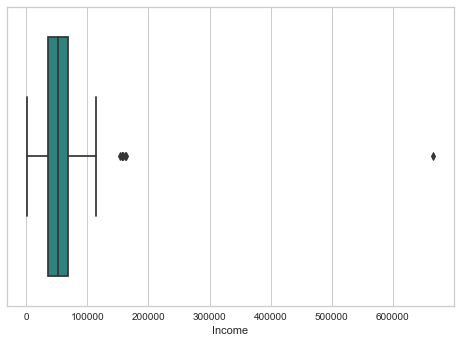

In [17]:
# Dies lässt sich auch schön in einem Boxplott visualisieren

sns.boxplot(data=marketing, x="Income", palette="viridis")

... Z-Score für diesen Fall berechnen 

In [18]:
marketing["Income"].sort_values(ascending=False).head(10)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64

**Beobachtung:**

Der Maxwert beim `Income` ist mit USD 666.666 deutlich höher als alle übrigen Werte und kann damit als Outlier betrachtet werden. Um das Clustering-Modell sinnvoll berechnen zu können, wird dieser Outlier sicherheitshalber entfernt. Die anderen Einkommenswerte jenseits der USD 150.000 werden allerdings im Dataframe belassen, da diese nicht sehr weit vom äußeren Whisker entfernt liegen. Eine Berechnung des Z-Scores könnte hier zusätzlich herangezogen werden, um zu bestimmen, ob es sich um Outlier handelt, oder nicht. Da die visuelle Darstellung allerdings schon sehr eindeutig ist, wird darauf an dieser Stelle verzichtet.

In [19]:
marketing.loc[[2233]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [20]:
mean1 = marketing["Income"].mean()
f"Der Mittelwert des Einkommens inklusive Outlier betrug: {mean1:.2f}."

'Der Mittelwert des Einkommens inklusive Outlier betrug: 52247.25.'

In [21]:
# Entfernung des Datensatzes mit der ID 2233 und dem hohen Income-Wert

marketing.drop(axis=0, index=2233, inplace=True)

In [22]:
marketing["Income"].sort_values(ascending=False).head()

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
Name: Income, dtype: float64

In [23]:
median2 = marketing["Income"].median()
f"Der Median des Einkommens nach Beseitigung des Outliers beträgt: {median2:.2f}."

'Der Median des Einkommens nach Beseitigung des Outliers beträgt: 51373.00.'

**Beobachtungen:**

- Die Entfernung des Outliers beim Jahreseinkommen war erfolgreich.
- Das Medianeinkommen ist nach Entfernung des Outliers geringfügig gesunken. Dies war jedoch zu erwarten.

In [24]:
# Imputieren der 24 fehlenden Werte in der Spalte Income mit dem Medianeinkommen
marketing["Income"] = marketing["Income"].fillna(marketing["Income"].median())
marketing.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [25]:
ratio1 = 24 / 2239
f"Die fehlenden Werte beim Income haben am gesamten Datenbestand lediglich ca.: {ratio1:.2%} ausgemacht."

'Die fehlenden Werte beim Income haben am gesamten Datenbestand lediglich ca.: 1.07% ausgemacht.'

**Beobachtungen:**

- Die fehlenden Werte in der Spalte `Income` wurden erfolgreich mit dem Medianeinkommen imputiert. 
- Auch das Löschen der fehlenden Werte beim `Income` wäre legitim gewesen, da der Anteil der fehlenden Werte (24) verglichen mit der Gesamtzahl aller Einträge (2.216) nur ca. 1 % ausmacht und damit sehr geringfügig ist. Dennoch wurde sich für das Imputieren der Werte entschieden.

**--- Altersstruktur ---**

In [26]:
marketing["Year_Birth"].sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
696     1995
1850    1995
747     1995
1170    1996
46      1996
Name: Year_Birth, Length: 2239, dtype: int64

In [27]:
OldestPerson = 2022 - marketing["Year_Birth"].sort_values()
OldestPerson

239     129
339     123
192     122
1950     82
424      81
       ... 
696      27
1850     27
747      27
1170     26
46       26
Name: Year_Birth, Length: 2239, dtype: int64

**Beobachtungen:**

Eine Analyse des Geburtsjahres zeigt, dass der Dataframe drei Datensätze mit sehr weit zurückliegenden Geburtsjahren beinhaltet. Das Geburtsdatum, welches am weitesten zurückliegt, ist 1893. Zwei weitere Personen sind in 1899 sowie 1900 geboren. Dies würde auf das aktuelle Jahr 2022 bezogen ein Alter von 129 bedeuten. Des weiteren zeigt ein Blick auf die Liste der ältesten Menschen der Welt, dass die aktuell älteste noch lebende bekannte Person (Lucile Randon) im Jahr 1904 geboren wurde [https://de.wikipedia.org/wiki/Liste_der_ältesten_Menschen] und somit 118 Jahre und 207 Tage alt ist. Somit können die drei beschriebenen Angaben im Dataframe als Outlier klassifiziert werden.

Für dieses Projekt wird als Referenzjahr für die folgenden Zeitraumberechnungen das Jahr 2015 festgelegt, da es sich um einen etwas älteren Datenbestand zu handeln scheint. Darauf deutet, dass `Dt_Customer` Werte aus den Jahren 2012, 2013 und 2014 hat.

In [28]:
# Entfernen der drei Outlier beim Alter

marketing.drop([239, 339, 192], axis=0, inplace=True)

In [29]:
# Bestätigung, dass die jetzigen Alterangaben bezogen auf aktuelle Jahr 2022 realsitischer sind. 

OldestPerson = 2022 - marketing["Year_Birth"].sort_values()
OldestPerson

1950    82
424     81
894     79
1150    79
39      79
        ..
747     27
2213    27
1850    27
1170    26
46      26
Name: Year_Birth, Length: 2236, dtype: int64

----

### 3.3 Daten transformieren  <a class="anchor" id="3.3 Daten transformieren"></a>

Checkliste für den Unterabschnitt "Datentransformation": 

a) Feature engineering:
- [x] Extrahieren des "Age" eines Kunden mit Hilfe von "Year_Birth", welches das Geburtsjahr der jeweiligen Person angibt.
- [x] Erstellen eines Merkmals "Spending", das den Gesamtbetrag angibt, den der Kunde in verschiedenen Kategorien über einen Zeitraum von zwei Jahren ausgegeben hat.
- [x] Erstellen eines Merkmals "Minors", um die Gesamtzahl der Kinder in einem Haushalt anzugeben, d. h. Kinder und Teenager.
- [x] Erstellen eines Merkmals "Has_child", um den Status der Elternschaft zu berücksichtigen.
- [x] Erstellen eines Merkmals "Engagement" abgleitet aus "Dt_Customer", um die Dauer der Kundenbeziehung zu erfassen.
- [x] Bildung von zwei Kategorien des Merkmals "Education", um die Werte zu vereinfachen.
- [x] Bildung von zwei Kategorien des Merkmals "Marital_Status", um die Lebenssituation von Paaren vereinfacht darzustellen.
- [x] Zuguterletzt Weglassen einiger überflüssiger Merkmale zur Reduktion der Komplexität.

b) Data Pre-processing:
- [x] Categorical encoding
- [x] Standard scaling

c) Dimensionality reduction:
- [x] (optional) PCA

In [30]:
# Hinzufügen einer neuen Spalte mit dem aktuellen Alter (ausgehend vom Geburtsjahr)
marketing["Age"] = 2015 - marketing["Year_Birth"]

In [31]:
# Vereinheitlichung der Merkmale zum Marital_Status
marketing["Marital_Status"] = marketing["Marital_Status"].replace(
    ["Married", "Together"], "Taken")
marketing["Marital_Status"] = marketing["Marital_Status"].replace(
    ["Divorced", "Widow", "Alone", "Absurd", "YOLO"], "Single")

In [32]:
marketing['Marital_Status'].value_counts()

Taken     1442
Single     794
Name: Marital_Status, dtype: int64

In [33]:
# Vereinheitlich der Merkmale zu Kids und Teenagern zu Minderjährige (Minors)
marketing["Minors"] = marketing["Kidhome"] + marketing["Teenhome"]

In [34]:
# Erstellen eines neuen Merkmals names "Has_child" zur Elterneigenschaft
marketing['Has_child'] = np.where(marketing.Minors > 0, 'Yes', 'No')

In [35]:
# Neues Feature zur Familiengröße

marketing["Family_size"] = marketing["Marital_Status"].replace({"Single": 1, "Taken":2}) + marketing["Minors"]

In [36]:
# Zusammenfassung der Ausgaben für die einzelnen Produktkategorien zu Ausgaben_Gesamt (Spending)
marketing["Spending"] = marketing["MntWines"] + marketing["MntFruits"] + marketing["MntMeatProducts"] + \
    marketing["MntFishProducts"] + \
    marketing["MntSweetProducts"] + marketing["MntGoldProds"]

In [37]:
# Zusammenfassung der akzetierten Marketingkampagnen (1-5) zu einem Merkmal (Cmp_total)
marketing["Cmp_total"] = marketing["AcceptedCmp1"] + marketing["AcceptedCmp2"] + \
    marketing["AcceptedCmp3"] + marketing["AcceptedCmp4"] + \
    marketing["AcceptedCmp5"] + marketing["Response"]

In [38]:
# Zusammenfassung der Anzahl der Käufe über unterschiedliche Kanäle (Online, Geschäft, Katalog) zu einem Merkmal
marketing["TotalNumPurch"] = marketing["NumWebPurchases"] + \
    marketing["NumCatalogPurchases"] + \
    marketing["NumStorePurchases"] + marketing["NumDealsPurchases"]

**--- Bildungsgrad ---**

Überarbeitung der Ausprägungen im Merkmal `Education`, so dass dieses sinnvoll aufgeteilt ist. Das Merkmal `Education` besteht aktuell aus folgenden Ausprägungen:

In [39]:
marketing["Education"].value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

Die im Dataframe vorkommenden 5 Kategorien werden nun gemäß dem US-Amerikanischen Modell in die Kategorien "Undergraduate" und "Postgraduate" aufgeteilt. Übertragen ins Deutsche konnen diese als Student:innen im Grundstudium vs. Master/Diplom/Doktorand unterschieden werden.

In [40]:
# Anpassen der Kategorien zum Bildungsstand in zwei Dimensionen
marketing["Education"] = marketing["Education"].replace(
    ["PhD", "Graduation", "Master"], "Postgraduate")
marketing["Education"] = marketing["Education"].replace(
    ["Basic", "2n Cycle"], "Undergraduate")

In [41]:
marketing["Education"].value_counts()

Postgraduate     1981
Undergraduate     255
Name: Education, dtype: int64

In [42]:
marketing["Education"].count()

2236

In [43]:
ratio2 = 255 / 2236
f"Der Anteil der Kategorie 'undergraduate' im Dataframe liegt lediglich bei ca.: {ratio2:.2%}."

"Der Anteil der Kategorie 'undergraduate' im Dataframe liegt lediglich bei ca.: 11.40%."

In [44]:
marketing["Age"].median()

45.0

**Beobachtung**:

Der Dataframe scheint weniger Personen der Kategorie "undergraduate" zu beinhalten. Der Anteil liegt lediglich bei ca. 11,4 %. Dies kann aber durchaus plausibel sein, wenn man sich das Medianalter (45) im Vergleich heranzieht. 

##### **--- Customer Engagement ---**

> Zeitraum, seitdem Kunde erstmal in Kontakt mit dem Unternehmen getreten ist (Zeitraum seit erster Bestellung/erstem Einkauf)

- Um den Zeitraum der Kundenbeziehung in Tagen darstellen zu können, wird in einem ersten Schritt der Datentyp des Merkmals "Dt_Customer" von object zu datetype geändert. 
- Direkt im Anschluss wird die Differenz zwischen dem Erstkontakt und dem Referenztag (01.01.2015) berechnet.

In [45]:
# Dauer seit Kundenerstkontakt in Tagen
marketing["Dt_Customer"] = pd.to_datetime(marketing.Dt_Customer, dayfirst=True)
marketing["Date_collected"] = "01-01-2015"
marketing["Date_collected"] = pd.to_datetime(marketing.Date_collected)
marketing["D_engaged"] = (
    marketing["Date_collected"] - marketing["Dt_Customer"]).dt.days

Bevor die weiteren Manipulationen am Dataframe vorgenommen werden, wird zur Sicherheit eine **Kopie des aktuellen Dataframes** erstellt. Dieser wird als custom_df benannt.

In [46]:
# Erstellung einer Kopie des Dataframes
custom_df = marketing

In [47]:
# Darstellung des aktuellen Bearbeitungsstandes des Dataframes
custom_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Minors,Has_child,Family_size,Spending,Cmp_total,TotalNumPurch,Date_collected,D_engaged
0,5524,1957,Postgraduate,Single,58138.0,0,0,2012-09-04,58,635,...,1,58,0,No,1,1617,1,25,2015-01-01,849
1,2174,1954,Postgraduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,61,2,Yes,3,27,0,6,2015-01-01,299
2,4141,1965,Postgraduate,Taken,71613.0,0,0,2013-08-21,26,426,...,0,50,0,No,2,776,0,21,2015-01-01,498
3,6182,1984,Postgraduate,Taken,26646.0,1,0,2014-02-10,26,11,...,0,31,1,Yes,3,53,0,8,2015-01-01,325
4,5324,1981,Postgraduate,Taken,58293.0,1,0,2014-01-19,94,173,...,0,34,1,Yes,3,422,0,19,2015-01-01,347


--- **KPIs** ---

**KPI #1 - Durchschnittliches Ordervolumen**

In [48]:
# Average Order Volume KPI

custom_df["AOV"] = (custom_df["Spending"]) / (custom_df["TotalNumPurch"])

In [49]:
custom_df["AOV"].sort_values(ascending=False)

981             inf
1524            inf
655             inf
2132            inf
2228    1679.000000
           ...     
1819       2.250000
2129       2.000000
1420       2.000000
1846       0.600000
1245       0.533333
Name: AOV, Length: 2236, dtype: float64

In [50]:
# Die "inf Werte" sind störend. Da es nur 4 Stück sind, können diese aus dem Dataframe entfernt werden.

custom_df.drop([655, 981, 1524, 2132], axis=0, inplace=True)

In [51]:
custom_df["AOV"].sort_values(ascending=False)

2228    1679.000000
1328     186.500000
644      173.230769
1001     158.416667
1749     148.733333
           ...     
1819       2.250000
1420       2.000000
2129       2.000000
1846       0.600000
1245       0.533333
Name: AOV, Length: 2232, dtype: float64

In [52]:
custom_df["AOV"].describe()

count    2232.000000
mean       33.325523
std        45.022235
min         0.533333
25%         9.714286
50%        23.386752
75%        45.353365
max      1679.000000
Name: AOV, dtype: float64

Das durchschnittliche Einkaufsvolumen (Ausgaben pro Order/Einkauf) liegt bei durchschnittlich 33 USD und bewegt sich in einer Spanne zwischen 0,53 USD und 1.679 USD pro Order/Einkauf.

**KPI #2 - Wochentag und Monat(e) mit den meisten Neukunden** 

In [53]:
# Hinzüfgen von zwei neuen Features aus der Dt_Customer Dimension
custom_df['Weekday'] = custom_df['Dt_Customer'].apply(lambda x: x.weekday())
custom_df['Month'] = pd.DatetimeIndex(custom_df['Dt_Customer']).month

In [54]:
# Wochentag mit den durchschnittlich am meisten Neukunden
custom_df['Weekday'].mean()

2.9847670250896057

Der Wochentag mit den meisten Neukunden ist durchschnittlich der Donnerstag [Index = 3] mit Montag als Index 0.

In [55]:
# Monat(e) mit den durchschnittlich am meisten Neukunden
custom_df['Month'].mean()

6.468637992831542

Die Monate mit den meisten Neukunden sind durchschnittlich die Sommermonate Juli/August (= 6,5) mit Januar als Index 0.

**Vereinfachung und Komplexitätsreduktion:**

Da einige Spalten/Features nun zusammengefasst, ersetzt und transformiert wurden, können wir die Komplexität reduzieren. Dazu werden nicht mehr benötigte Features im nächsten Schritt aus dem Dataframe entfernt.

In [56]:
# Analyse der Spalte "Complain" und die Verteilung der Werte in dieser
custom_df["Complain"].value_counts()

0    2212
1      20
Name: Complain, dtype: int64

Da nur 20 Personen von über 2.200 eine Beschwerde eingereicht haben, ist das Gewicht dieses Features sehr unbedeutend. Es wird deshalb zur Reduktion der Komplexität aus dem Dataframe entfernt. Großes Lob geht an das Kundenmanagment des Unternehmens an dieser Stelle! 

In [57]:
# Zunächst werden alle nicht mehr benötigten Spalten in einer Liste als Variable gespeichert 
col_del = [
    "ID",
    "Year_Birth",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Kidhome",
    "Teenhome",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Dt_Customer",
    "Complain",
    "Date_collected"
]
# Anschließend werden diese mit "drop" aus dem Dataframe entfernt und das Ergebnis dargestellt
custom_df = custom_df.drop(columns=col_del, axis=1)
custom_df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Minors,Has_child,Family_size,Spending,Cmp_total,TotalNumPurch,D_engaged,AOV,Weekday,Month
0,Postgraduate,Single,58138.0,58,635,88,546,172,88,88,...,0,No,1,1617,1,25,849,64.680000,1,9
1,Postgraduate,Single,46344.0,38,11,1,6,2,1,6,...,2,Yes,3,27,0,6,299,4.500000,5,3
2,Postgraduate,Taken,71613.0,26,426,49,127,111,21,42,...,0,No,2,776,0,21,498,36.952381,2,8
3,Postgraduate,Taken,26646.0,26,11,4,20,10,3,5,...,1,Yes,3,53,0,8,325,6.625000,0,2
4,Postgraduate,Taken,58293.0,94,173,43,118,46,27,15,...,1,Yes,3,422,0,19,347,22.210526,6,1


In [58]:
# "Z_CostContact" und "Z_Revenue" können aufgrund ihrer Eindimensionalität ebenfalls entfernt werden
custom_df = custom_df.drop(["Z_CostContact", "Z_Revenue"], axis=1)

In [59]:
# Umbenennen einiger Spaltenbezeichnungen
custom_df = custom_df.rename(columns={
    "MntWines": "Wine",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold",
    "NumWebVisitsMonth": "No_Webview",
    "NumWebPurchases": "WebBuy",
    "NumCatalogPurchases": "CatBuy",
    "NumStorePurchases": "StoreBuy",
    "NumDealsPurchases": "Deals"
})

custom_df.head()

,Education,Marital_Status,Income,Recency,Wine,Fruits,Meat,Fish,Sweets,Gold,...,Minors,Has_child,Family_size,Spending,Cmp_total,TotalNumPurch,D_engaged,AOV,Weekday,Month
0,Postgraduate,Single,58138.0,58,635,88,546,172,88,88,...,0,No,1,1617,1,25,849,64.680000,1,9
1,Postgraduate,Single,46344.0,38,11,1,6,2,1,6,...,2,Yes,3,27,0,6,299,4.500000,5,3
2,Postgraduate,Taken,71613.0,26,426,49,127,111,21,42,...,0,No,2,776,0,21,498,36.952381,2,8
3,Postgraduate,Taken,26646.0,26,11,4,20,10,3,5,...,1,Yes,3,53,0,8,325,6.625000,0,2
4,Postgraduate,Taken,58293.0,94,173,43,118,46,27,15,...,1,Yes,3,422,0,19,347,22.210526,6,1


In [60]:
# Darstellung des transformierten Dataframes mit eigens definierter Spaltenreihenfolge

custom_df = custom_df[[
    "Age",
    "Marital_Status",
    "Minors",
    "Has_child",
    "Family_size",
    "Income",
    "Education",
    "D_engaged",
    "Wine",
    "Fruits",
    "Meat",
    "Fish",
    "Sweets",
    "Gold",
    "Spending",
    "WebBuy",
    "CatBuy",
    "StoreBuy",
    "Deals",
    "TotalNumPurch",
    "Recency",
    "No_Webview",
    "Cmp_total",
    "Response",
    "AOV"
]]

custom_df.head()

,Age,Marital_Status,Minors,Has_child,Family_size,Income,Education,D_engaged,Wine,Fruits,...,WebBuy,CatBuy,StoreBuy,Deals,TotalNumPurch,Recency,No_Webview,Cmp_total,Response,AOV
0,58,Single,0,No,1,58138.0,Postgraduate,849,635,88,...,8,10,4,3,25,58,7,1,1,64.680000
1,61,Single,2,Yes,3,46344.0,Postgraduate,299,11,1,...,1,1,2,2,6,38,5,0,0,4.500000
2,50,Taken,0,No,2,71613.0,Postgraduate,498,426,49,...,8,2,10,1,21,26,4,0,0,36.952381
3,31,Taken,1,Yes,3,26646.0,Postgraduate,325,11,4,...,2,0,4,2,8,26,6,0,0,6.625000
4,34,Taken,1,Yes,3,58293.0,Postgraduate,347,173,43,...,5,3,6,5,19,94,5,0,0,22.210526


Text(0, 0.5, 'Einkäufe')

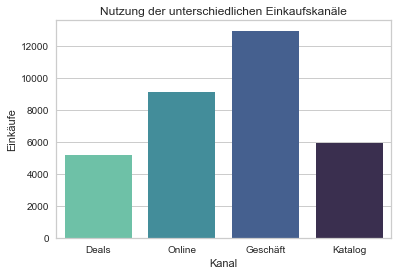

In [61]:
plt.figure(figsize = (6, 4))
tp = custom_df[['Deals', 'WebBuy', 'StoreBuy', 'CatBuy']].agg([sum])

sns.barplot(x = tp.T.index, y = tp.T['sum'], palette = 'mako_r')
plt.gca().set_xticklabels(['Deals', 'Online', 'Geschäft', 'Katalog'])
plt.title('Nutzung der unterschiedlichen Einkaufskanäle')
plt.xlabel('Kanal')
plt.ylabel('Einkäufe')

Text(0.5, 1.0, 'Anzahl Minderjähriger im Haushalt und Haushaltsausgaben')

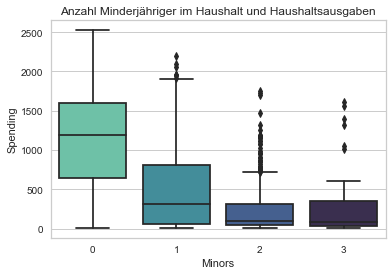

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(data=custom_df, x='Minors', y='Spending', palette = 'mako_r')
plt.title('Anzahl Minderjähriger im Haushalt und Haushaltsausgaben')

Darstellung der **Korrelationen** der Features im Dataframe:

<AxesSubplot:>

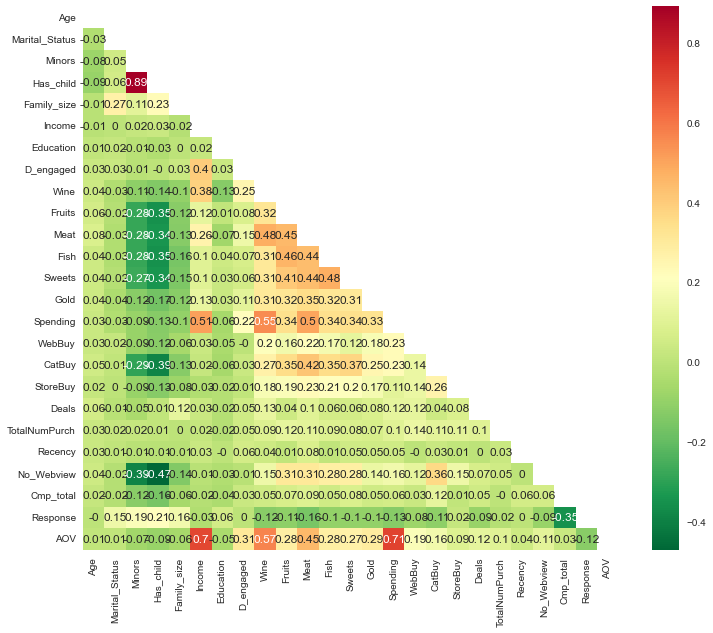

In [63]:
corr = custom_df.apply(lambda x: pd.factorize(x)[0]).corr(
    method='pearson').round(decimals=2)

# Erstelle eine Matrix mit False Werten
mask = np.zeros_like(corr, dtype=bool)

# Gibt die Indizes wieder für das "upper-triangle" des Arrays und setzt diese Werte auf "True"
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 10))

sns.heatmap(data=corr,
            annot=True,
            cmap="RdYlGn_r",
            # Ausblenden alle Werte des oberen "Triangles" in der Darstellung
            mask=mask)

**Beobachtungen:**

- Korrelationen nehmen Ausprägungen zwischen -1 und 1 an. Dabei zeigen Werte nahe 1 eine hohe positive Korrelation zweier Features an, Werte nahe -1 eine hohe negative Korrelation. Werte nahe 0 deuten auf unkorrelierte Features hin. 
- Es ist insgesamt eine geringe Korrelationen zwischen den Features zu beobachten. Eine mittlere Korrelation besteht zwischen den Features `Spending` und `Income` mit 0,51. Diese Korrelation kann als plausibel interpretiert werden, da ein höheres Einkommen auch die Möglickeit höherer Ausgaben impliziert.
- Hohe Ausgaben `Spending` korrelieren zudem eher mit dem Einkauf von Wein (= 0,55) und Fleischprodukten (= 0,50).
- Die Korrelation zwischen der Elterneigenschaft `Has_child` und der Anzahl an abhängigen Kindern ist durch den Zusammenhang bedingt sehr hoch (= 0,89).
- Sehr interessant ist zudem, dass Haushalte mit Kindern weniger Früchte, Fleisch, und Fischprodukte kaufen. Diese Werte sind umgekehrt korreliert.

**--- Data Preprocessing ---**

**Categorial Encoding**

In diesem Abschnitt werden nun die kategorialen Werte für die Features `Marital_Status` sowie `Education` in integer Werte transformiert. Diese werden im Clustering Modell als Zahlenwerte benötigt.

In [64]:
enco = []
for i in custom_df.columns:
    if (custom_df[i].dtypes == "object"):
        enco.append(i)

print(enco)

['Marital_Status', 'Has_child', 'Education']


**Beobachtung:**

Features vom Datentyp object im Dataframe sind `Marital_Status`, `Has_child` sowie `Education`.

Für die Transformation wird das sogenannte Label Encoding verwendet. Dieses weist jedem string einen Zahlenwert zu (zum Beispiel Single = 0, Taken = 1). Der vergebene Wert enthält dabei keine Wertung und ist rein zufällig.

In [65]:
le = LabelEncoder()

le = LabelEncoder()
for i in enco:
    custom_df[i] = custom_df[[i]].apply(le.fit_transform)

In [66]:
print(custom_df["Education"].value_counts())
print("-----------------------------------")
print(custom_df["Marital_Status"].value_counts())
print("-----------------------------------")
print(custom_df["Has_child"].value_counts())

0    1977
1     255
Name: Education, dtype: int64
-----------------------------------
1    1441
0     791
Name: Marital_Status, dtype: int64
-----------------------------------
1    1598
0     634
Name: Has_child, dtype: int64


Änderung der kategorialen Merkmalen `Education` und `Marital_Status` war erfolgreich und diese können somit für die weitere Modellierung wie folgt genutzt werden.

- Education
    - "postgraduate" = 0
    - "undergraduate" = 1  
- Marital_Status
    - "Taken" = 1
    - "Single" = 0
- Has_child
    - "Yes" = 1
    - "No" = 0

In [67]:
custom_df.head(5)

,Age,Marital_Status,Minors,Has_child,Family_size,Income,Education,D_engaged,Wine,Fruits,...,WebBuy,CatBuy,StoreBuy,Deals,TotalNumPurch,Recency,No_Webview,Cmp_total,Response,AOV
0,58,0,0,0,1,58138.0,0,849,635,88,...,8,10,4,3,25,58,7,1,1,64.680000
1,61,0,2,1,3,46344.0,0,299,11,1,...,1,1,2,2,6,38,5,0,0,4.500000
2,50,1,0,0,2,71613.0,0,498,426,49,...,8,2,10,1,21,26,4,0,0,36.952381
3,31,1,1,1,3,26646.0,0,325,11,4,...,2,0,4,2,8,26,6,0,0,6.625000
4,34,1,1,1,3,58293.0,0,347,173,43,...,5,3,6,5,19,94,5,0,0,22.210526


In [68]:
overview = custom_df[[
    "Age",
    "Marital_Status",
    "Minors",
    "Family_size",
    "Income",
    "Education",
    "D_engaged",
    "Spending",
    "Deals",
    "TotalNumPurch",
    "Recency",
    "No_Webview",
    "Cmp_total",
    "Response",
    "AOV"
]]

In [69]:
overview.describe()

,Age,Marital_Status,Minors,Family_size,Income,Education,D_engaged,Spending,Deals,TotalNumPurch,Recency,No_Webview,Cmp_total,Response,AOV
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,46.095878,0.645609,0.952061,2.597670,51902.612007,0.114247,540.006272,607.061380,2.330197,14.899194,49.095878,5.315860,0.448029,0.149642,33.325523
std,11.704862,0.478435,0.752069,0.906846,21157.137715,0.318183,202.168289,601.868004,1.932251,7.658860,28.958474,2.409856,0.891710,0.356800,45.022235
min,19.000000,0.000000,0.000000,1.000000,1730.000000,0.000000,186.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.533333
25%,38.000000,0.000000,0.000000,2.000000,35538.750000,0.000000,367.000000,69.000000,1.000000,8.000000,24.000000,3.000000,0.000000,0.000000,9.714286
50%,45.000000,1.000000,1.000000,3.000000,51373.000000,0.000000,542.000000,397.000000,2.000000,15.000000,49.000000,6.000000,0.000000,0.000000,23.386752
75%,56.000000,1.000000,1.000000,3.000000,68179.500000,0.000000,715.000000,1047.250000,3.000000,21.000000,74.000000,7.000000,1.000000,0.000000,45.353365
max,75.000000,1.000000,3.000000,5.000000,162397.000000,1.000000,885.000000,2525.000000,15.000000,44.000000,99.000000,20.000000,5.000000,1.000000,1679.000000


Eine **erneute Überprüfung der statistischen Werte** nach der Transformation der Daten:
- die Outlier beim Alter sowie beim Einkommen wurden entfernt. Es gibt keine fehlenden Werte mehr im Dataframe.
- der Dataframe hat nach der Bearbeitung nun 2.236 Zeilen. 
- das Alter liegt zwischen 19 und 75 Jahren (abhängig vom gewählten Referenzjahr).
- das Jahreseinkommen liegt zwischen 1.730 und 162.397 USD.
- die Haushalte haben zwischen 0 und 3 Kinder.
- die Ausgaben über alle Produktkategorien liegen zwischen 5 und 2.525.
- die Anzahl an Einkäufen über alle Kanäle liegt zwischen 0 und 44. 
- der letzte Einkauf in Tagen liegt zwischen 0 und 99.

Der **Average-Customer** weist dabei die folgendes Profil auf:

In [70]:
overview.mean()

Age                  46.095878
Marital_Status        0.645609
Minors                0.952061
Family_size           2.597670
Income            51902.612007
Education             0.114247
D_engaged           540.006272
Spending            607.061380
Deals                 2.330197
TotalNumPurch        14.899194
Recency              49.095878
No_Webview            5.315860
Cmp_total             0.448029
Response              0.149642
AOV                  33.325523
dtype: float64

**Standardisierung**

In diesem Abschnitt soll der transformierte Dataframe custom_df einer Standardisierung unterzogen werden. Diese ist sinnvoll, um die Features auf eine einheitliche Wertebasis zu bringen. Dies hilft bei der anschließenden Modellberechnung sinnvollere Ergebnisse zu generieren. Als Verfahren soll der sogenannte Standard Scaler [6] verwendet werden. Um die Standardisierung vorzunehmen, wird der Dataframe zunächst kopiert (X). Zudem wird ein Zwischenstand (final_df) als csv-Datei abgespeichert.

In [71]:
X = custom_df

In [72]:
num_cols = [
    "Age",
    "Minors",
    "Family_size",
    "Income",
    "D_engaged",
    "WebBuy",
    "CatBuy",
    "StoreBuy",
    "Deals",
    "TotalNumPurch",
    "Spending",
    "Recency",
    "No_Webview",
    "Cmp_total",
    "AOV"
]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()

,Age,Marital_Status,Minors,Has_child,Family_size,Income,Education,D_engaged,Wine,Fruits,...,WebBuy,CatBuy,StoreBuy,Deals,TotalNumPurch,Recency,No_Webview,Cmp_total,Response,AOV
0,1.017252,0,-1.266206,0,-1.762182,0.294784,0,1.528741,635,88,...,1.406475,2.507790,-0.556716,0.346722,1.319135,0.307548,0.699012,0.619142,1,0.696578
1,1.273613,0,1.393721,1,0.443758,-0.262789,0,-1.192374,11,1,...,-1.114723,-0.570516,-1.173232,-0.170926,-1.162208,-0.383251,-0.131100,-0.502550,0,-0.640394
2,0.333622,1,-1.266206,0,-0.659212,0.931828,0,-0.207825,426,49,...,1.406475,-0.228482,1.292834,-0.688573,0.796747,-0.797730,-0.546155,-0.502550,0,0.080575
3,-1.289999,1,0.063757,1,0.443758,-1.194031,0,-1.063740,11,4,...,-0.754552,-0.912551,-0.556716,-0.170926,-0.901014,-0.797730,0.283956,-0.502550,0,-0.593185
4,-1.033638,1,0.063757,1,0.443758,0.302112,0,-0.954895,173,43,...,0.325961,0.113552,0.059801,1.382016,0.535553,1.550986,-0.131100,-0.502550,0,-0.246933


In [73]:
final_df = X

In [74]:
# Abspeichern des transformierten Dataframes im Projekt Data-Ordner
final_df.to_csv(r"data/final_df.csv")

<div class="alert alert-block alert-success">
<b>Zusammenfassung:</b><br>
- In diesem Abschnitt wurden die Daten tiefergehend gesichtet und manipuliert. Dabei wurden einzelne Anomalien (fehlende Daten, Ausreißer) identifiziert und behoben. <br>
- Weiter wurden Daten transformiert, also einzelne Features im Datentyp geändert (Label encoding) sowie neue Features erstellt und die Komplexität reduziert.<br>
- Es wurde ein Pre-Processing der Daten durchgeführt (Standardisierung/Normalisierung), in Vorbereitung auf die Cluster-Modell Berechnung.
    </div>

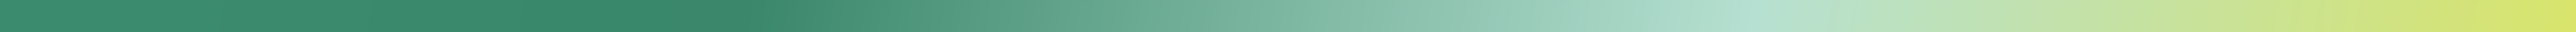

## 4. Modelling <a class="anchor" id="4. Modelling"></a>

Checkliste für den Abschnitt "Modelling":

- [x] Ein geeignetes Clusering Modell wird gewählt
- [x] Die passende Anzahl an Clusters wird mit der "Elbow-Methode" bestimmt
- [x] Die Cluster werden berechnet und interpretiert
- [x] Eine Visualisierung der Cluster wird dargestellt

### 4.1 Modellauswahl <a class="anchor" id="4.1 Modellauswahl"></a>

In dieser Projektarbeit wird ein unsupervised learning Modell verwendet. Anders als beim supervised learning (z.B. Klassifikations- oder Regressionmodelle) besteht im Dataset kein Marker bzw. keine markierten Ergebnisse, welche bereits die richtigen Resultate für Zusammenhänge im Dataset darstellen und so zum Trainieren eines Machine Learning Modells verwendet werden können. Als Beispiel für **supervised learning** könnte ein Dataset basierend auf gemessenen Merkmalen zu sportlichen Aktivitäten wie Herzfrequenz, Körpergewicht, Körpergröße, Alter, Dauer der Aktivität und dem zugehörigen Kalorienverbrauch dazu genutzt werden, den Kalorienverbrauch vorherzusagen. Dazu werden im sogenannten Train-Test-Split ein Trainings- und ein Test-Dataset aus den Ursprungsdaten gebildet. Ein Regressionsmodell könnte dann mit den Trainingsdaten trainiert werden. Anschließend können die Testdaten zur Bestimmung der Genauigkeit des Modells herangezogen werden. Ein Regressionmodell könnte nun anhand von zufällig gewählten Input-Werten (Herzfrequenz, Körpergewicht, Körpergröße, Alter, Dauer der Aktivität) den voraussichtlichen Kalorienverbrauch berechnen. [Das beschriebene Vorgehen wurde bereits als Projekt im "Programmierung im Python" Kurs gemacht, weshalb nun unsupervised Techniken interessanter sind.]

Beim **unsupervised learning** liegen diese hilfreichen Resultate vorab nicht vor. Vielmehr werden z.B. "Muster" oder Zusammenhänge in einem Dataframe identifiziert. Ein Train-Test-Split findet in diesem Projekt beim unsupervised learning ebenfalls nicht statt. Zusammengefasst lässt sich sagen,  dass das unüberwachte Lernen verwendet wird, um Muster in den Eingabedaten zu erkennen, ohne auf markierte Ergebnisse (Trainingsdaten) zurückgreifen zu können.

Das gängigste und spannendste Modell im Bereich unüberwachtes Lernen/Clustering für dieses Projekt ist das: `K-Means Clustering` [7]. Das K-Means Clustering ist eine Methode des unüberwachten Lernens und versucht gleiche Daten zusammenzufassen und unterschiedliche Daten zu separieren. Dabei werden die Abstände gleichartiger Daten innerhalb eines Clusters möglichst minimiert und der Abstand gegenüber anderen Clustern möglichst maximiert. Ziel ist es dabei, eine passende Anzahl von k Clustern zu finden, so dass die partitionierten Datenpunkte innerhalb eines Clusters möglichst "ähnlich" sind. Die Ähnlichkeit zweier Punkte zeigt sich durch deren Abstand zueinander. Dieser kann auf unterschiedliche Arten gemessen werden. Der euklidische Abstand ist dabei eine gängige Messvariante. Als Vergleichswert wird das hierarchische Clustering [8] herangezogen (Benchmark), jedoch nicht tiefer erläutert.

Weitere interessante Ansätze, welche jedoch hier nicht weiter im Detail betrachtet werden, sind das Mean-Shift-Clustering und das Density Based Clustering (DBSCAN).

Da der Dataframe keine fehlenden Werte beinhaltet, dabei über 2200 Datensätze zählt und die Werte miteinander insgesamt nicht all zu stark korrelieren, ist das K-Means Clustering als sehr gut geeignetes Modell für dieses Projekt zu bewerten.

### 4.2 Modell aufsetzen <a class="anchor" id="4.2 Modell aufsetzen"></a>

Wie bereits in der Modellauswahl beschrieben, ist es wichtig, die richtige Anzahl von k Clustern so zu bestimmen, dass die Segmentierung möglichst sinnvoll in die Cluster übertragbar ist. Dabei hilft die sogennante `Elbow Method`.

**Elbow Method**

Jedes Mal wenn wir ein weiteres Cluster hinzufügen, also K + 1, verringert sich die Varianz. Die Reduktion der Varianz wird immer kleiner. Wenn wir K = N hätten, wobei N für die Anzahl der Datenpunkte steht (also jeder Datenpunkt ist ein eigener Cluster), wäre die Varianz = 0. Dann wäre der Sinn des Clusterings allerdings verfehlt, da es ja gerade um eine Zusammenfassung gleichartiger Daten geht (Daten mit dem geringsten euklidischen Abstand zueinander finden). Der Punkt, ab dem die zusätzliche erklärte Varianz bei Zunahme eines weiteren Clusters stark sinkt, nennt sich „elbow“. Deswegen wird die folgende Darstellung auch “Elbow plot“ genannt. **WCSS** seht für "**W**ithin-**C**luster **S**um of **S**quares" [9], also für die Summe des quadratischen Abstands zwischen jedem Punkt im Cluster und dessen Zentrum (Centroid).

Text(0, 0.5, 'WCSS')

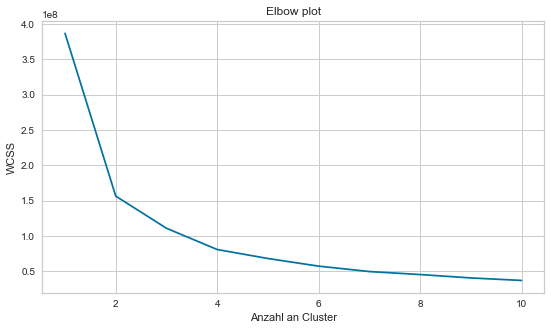

In [75]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(9, 5))
plt.plot(range(1, 11), wcss, 'bx-')

plt.title('Elbow plot')
plt.xlabel('Anzahl an Cluster')
plt.ylabel('WCSS')

Elbow Method:


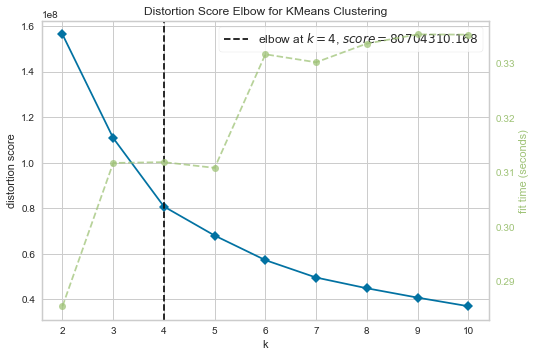

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
# Schnelle Darstellung und Finden der passenden Clusteranzahl mit Hilfe des K-Elbow-Visualizer
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

Mit Hilfe der Elbow-Method und dem KElbowVisualizer wird die passende **Anzahl an Cluster für den vorliegenden Dataframe auf 4 festgelegt**. 

In [77]:
# intertia_float

kmeans.inertia_

36947735.11875459

### 4.3 Modell trainieren <a class="anchor" id="4.3 Modell trainieren"></a>

Nun wird das K-Means Clustering Modell angewandt. Dazu werden die bereits als passend identifizierten 4 Cluster vorgegeben. Die Vorhersagen `predictions`, zu welchem Cluster ein Dateneintrag zurgeordnet werden soll, wird dem Dataframe als neues Feature in neuer Spalte hinzugefügt.

In [78]:
# Clusterzuordnung mit kmeans Algorithmus berechnen und anschließend als neue Spalte dem Dataframe hinzufügen

kmeans = KMeans(n_clusters=4, n_init=20, max_iter=600 )
predictions = kmeans.fit_predict(X)

X["Clusters"] = predictions

Alternativ hätte auch das hierarchische Clustering verwendet werden können. Hier jedoch nur symbolhaft als Codeblock gezeigt.

In [79]:
#Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

#Fit model and predict clusters
predictions2 = AC.fit_predict(X)

#Adding the Clusters feature to the dataframe
X["Clusters_AC"] = predictions2

**Bewertung der beiden Clustering-Methoden** anhand des Silhouette Scores [10]. 

> $ silhouette score = (p - q) / max(p, q) $

p - Distanz zum nächsten Cluster, dem der Datenpunkt nicht angehört.

q - Distanz zu allen Punkten in dem Cluster, dem der Punkt angehört.

Der Wertebereich des silhouette-scores liegt zwischen -1 und 1. 

Der beste Wert ist 1 und der schlechteste Wert ist -1. Werte nahe 0 weisen auf überlappende Cluster hin. Negative Werte deuten im Allgemeinen darauf hin, dass eine Probe dem falschen Cluster zugeordnet wurde, da ein anderer Cluster ähnlicher ist.

In [80]:
print('kmeans: {}'.format(silhouette_score(X, predictions, metric='euclidean')))
print('AC: {}'.format(silhouette_score(X, predictions2, metric='euclidean')))

kmeans: 0.5353815637335413
AC: 0.5244608164688135


**Hyperparameter Tuning:**

Mit der Reduktion von Dimensionen wurde stetig die Komplexität reduziert, um so den Silhoutte Score zu verbessern. Zudem wurden die Ergebnisse verglichen zwischen einer Variante mit Standardisierung (StandardScaler) und einer mit Normalisierung (MinMaxScaler) des Dataframes [11]. Die hier gewählte Standardisierung hat leicht bessere Ergebnisse geliefert und wurde deswegen gewählt (ggf. weniger sensitiv gegenüber Extremwerten).

In [81]:
# Die neue Cluster-Spalte und deren Wertedimensionen werden dargestellt
X["Clusters"].describe()

count    2232.000000
mean        1.047043
std         1.272412
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         3.000000
Name: Clusters, dtype: float64

In [82]:
num_cols = [
    "Age",
    "Minors",
    "Family_size",
    "Income",
    "D_engaged",
    "WebBuy",
    "CatBuy",
    "StoreBuy",
    "Deals",
    "TotalNumPurch",
    "Spending",
    "Recency",
    "No_Webview",
    "Cmp_total",
    "AOV"
]

X[num_cols] = scaler.inverse_transform(X[num_cols])
X

,Age,Marital_Status,Minors,Has_child,Family_size,Income,Education,D_engaged,Wine,Fruits,...,StoreBuy,Deals,TotalNumPurch,Recency,No_Webview,Cmp_total,Response,AOV,Clusters,Clusters_AC
0,58.0,0,0.0,0,1.0,58138.0,0,849.0,635,88,...,4.0,3.0,25.0,58.0,7.0,1.0,1,64.680000,2,0
1,61.0,0,2.0,1,3.0,46344.0,0,299.0,11,1,...,2.0,2.0,6.0,38.0,5.0,0.0,0,4.500000,0,1
2,50.0,1,0.0,0,2.0,71613.0,0,498.0,426,49,...,10.0,1.0,21.0,26.0,4.0,0.0,0,36.952381,3,0
3,31.0,1,1.0,1,3.0,26646.0,0,325.0,11,4,...,4.0,2.0,8.0,26.0,6.0,0.0,0,6.625000,0,1
4,34.0,1,1.0,1,3.0,58293.0,0,347.0,173,43,...,6.0,5.0,19.0,94.0,5.0,0.0,0,22.210526,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,48.0,1,1.0,1,3.0,61223.0,0,567.0,709,43,...,4.0,2.0,18.0,46.0,5.0,0.0,0,74.500000,3,0
2236,69.0,1,3.0,1,5.0,64014.0,0,205.0,406,0,...,5.0,7.0,22.0,56.0,7.0,1.0,0,20.181818,3,0
2237,34.0,0,0.0,0,1.0,56981.0,0,341.0,908,48,...,13.0,1.0,19.0,91.0,6.0,1.0,0,65.315789,1,2
2238,59.0,1,1.0,1,3.0,69245.0,0,342.0,428,30,...,10.0,2.0,23.0,8.0,3.0,0.0,0,36.652174,3,0


In [83]:
# Anzahl der Features im Transformierten Dataframe zur Einschätzung der Komplexität
X.columns.value_counts().sum()

27

Nun können die neu gebildeten Cluster visualisiert werden.

Text(0.5, 1.0, 'Verteilung der Cluster')

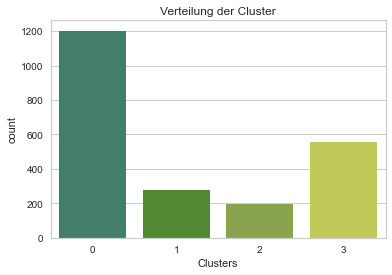

In [84]:
# Erstellung eines Säulendiagramms zur Darstellung der Clusterverteilung
plt.figure(figsize = (6, 4))
pal = ["#3A876B", "#4D9724", "#90B141", "#CEDD46"]
pl = sns.countplot(x=X["Clusters"], palette = pal)
pl.set_title("Verteilung der Cluster")

In [85]:
X["Clusters"].value_counts()

0    1202
3     554
1     277
2     199
Name: Clusters, dtype: int64

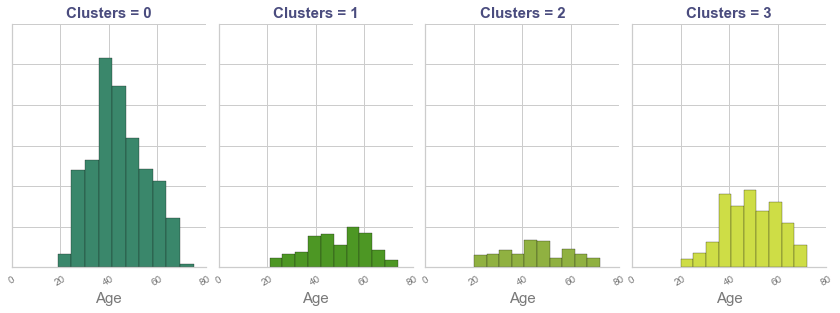

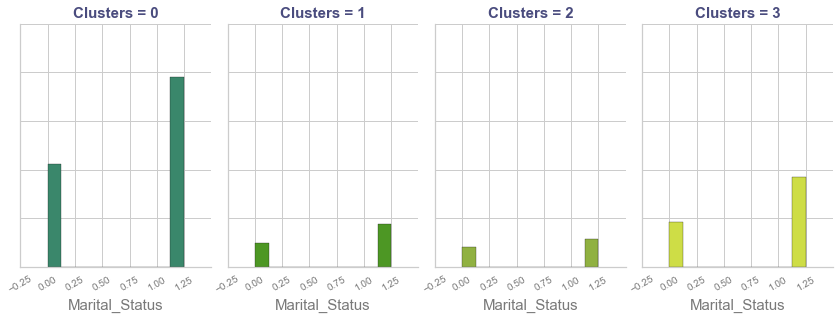

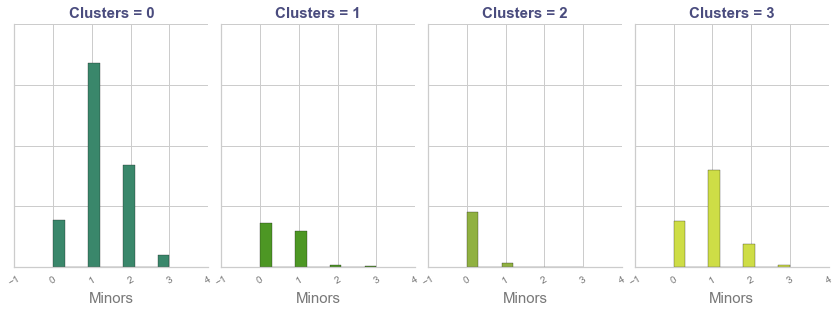

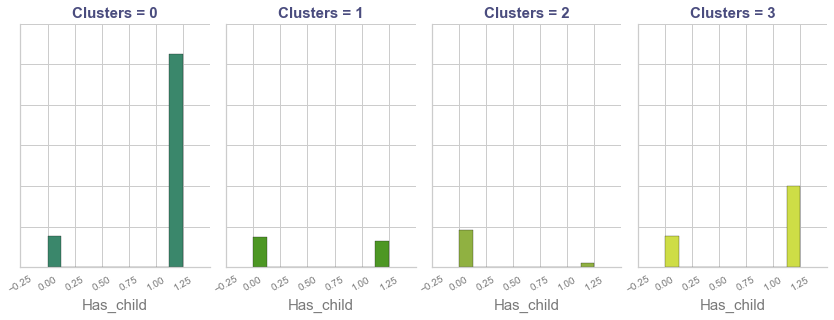

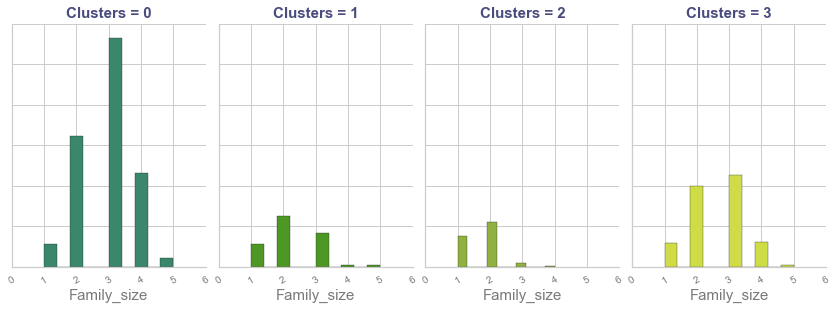

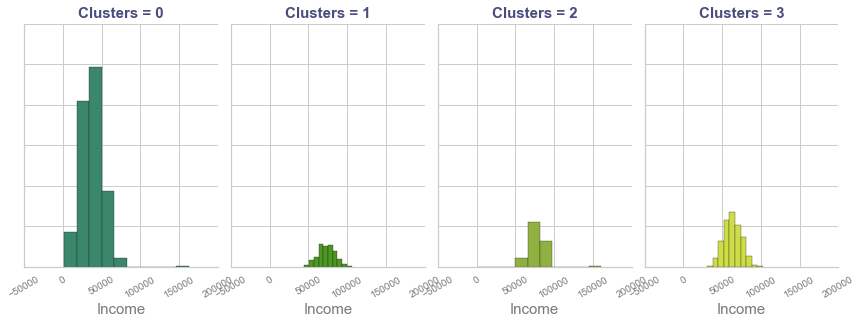

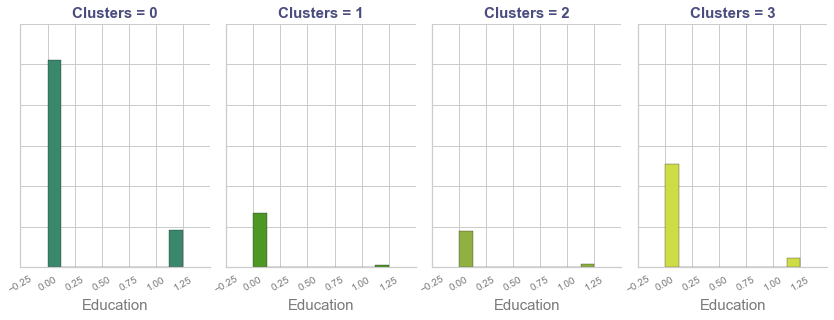

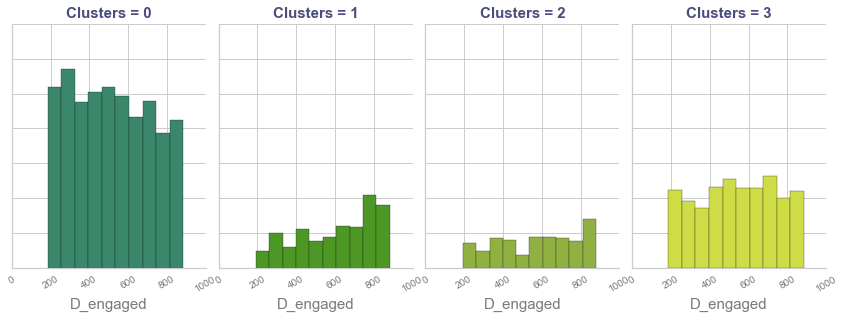

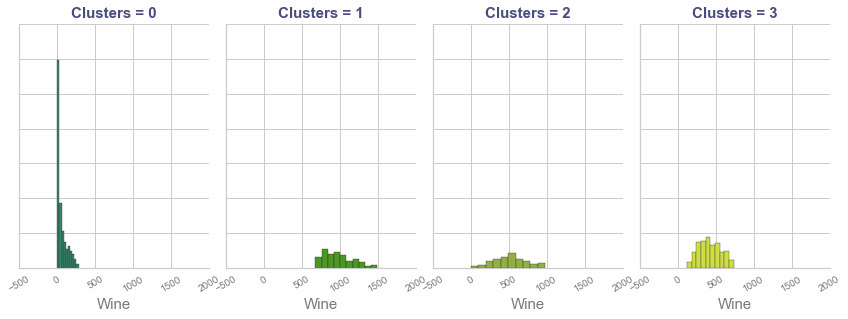

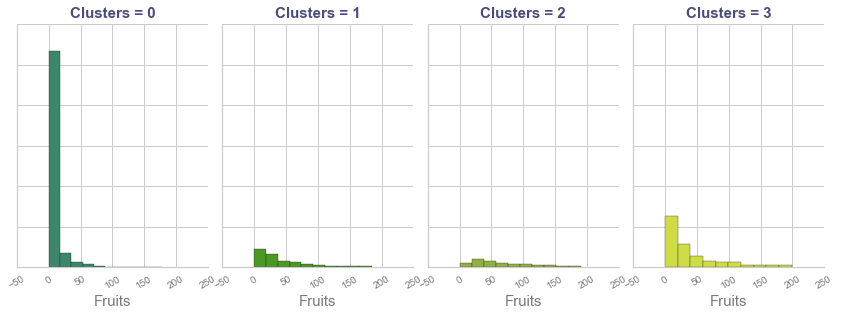

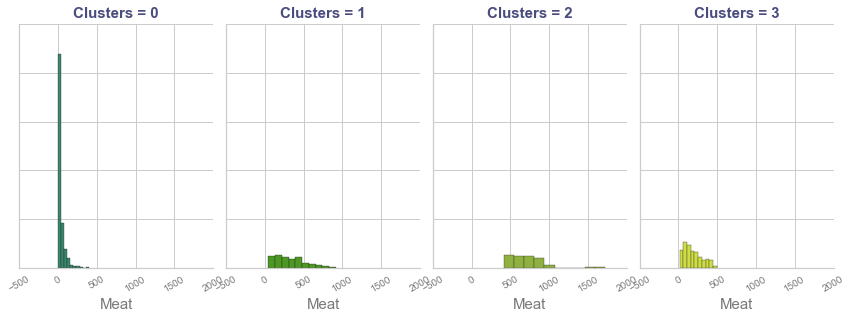

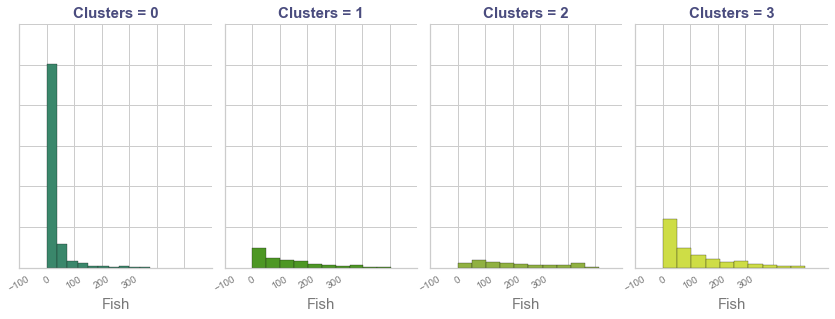

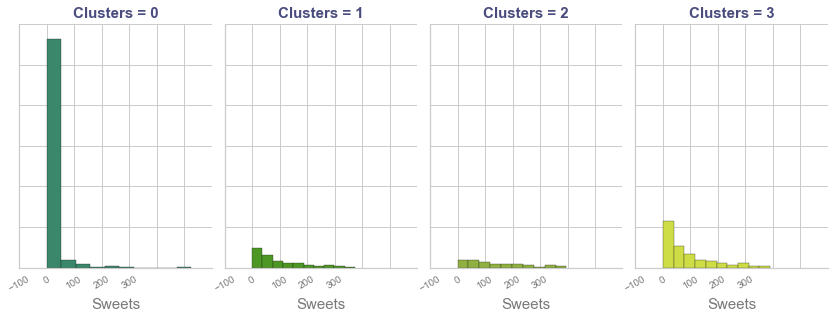

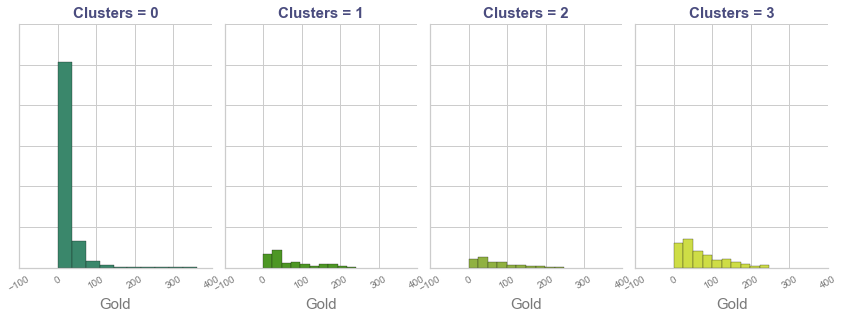

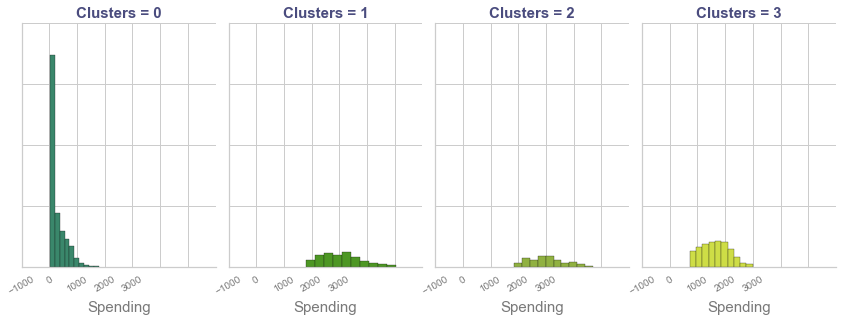

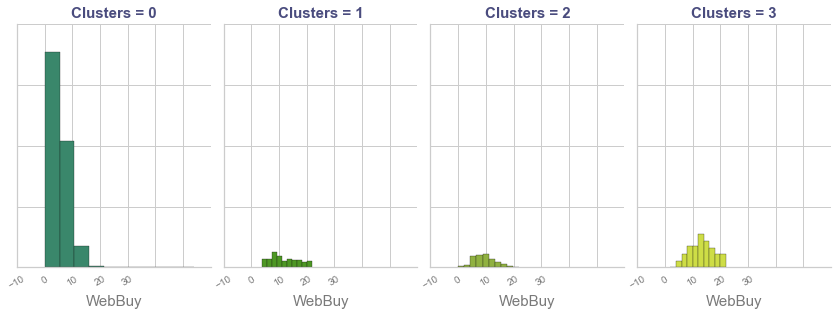

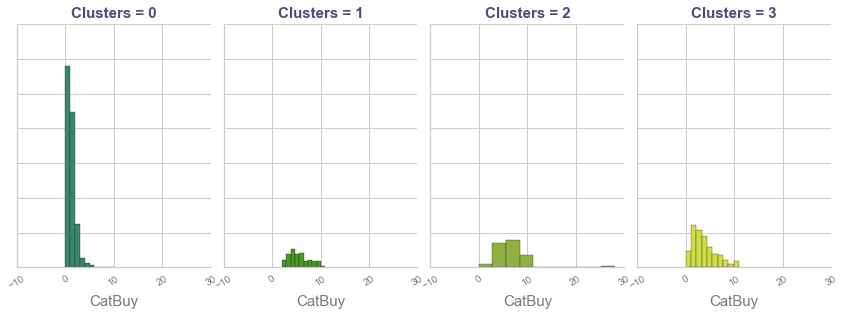

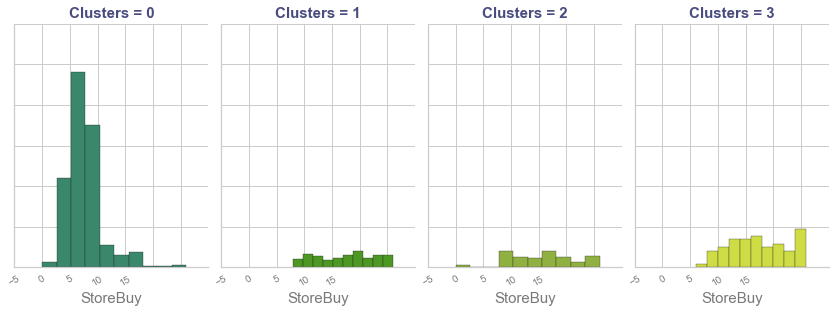

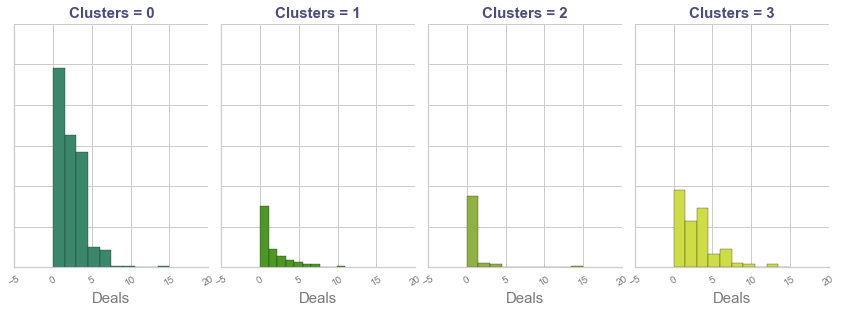

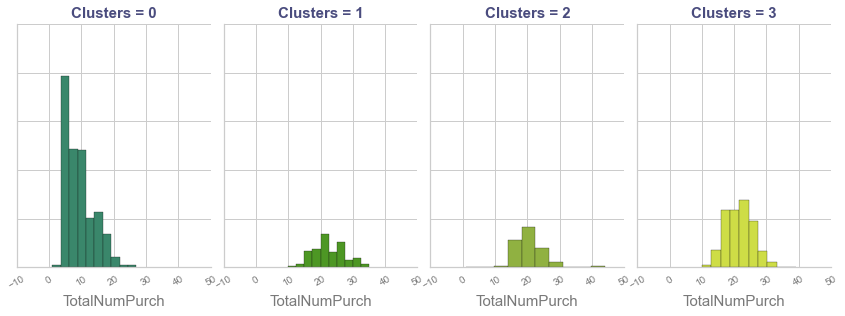

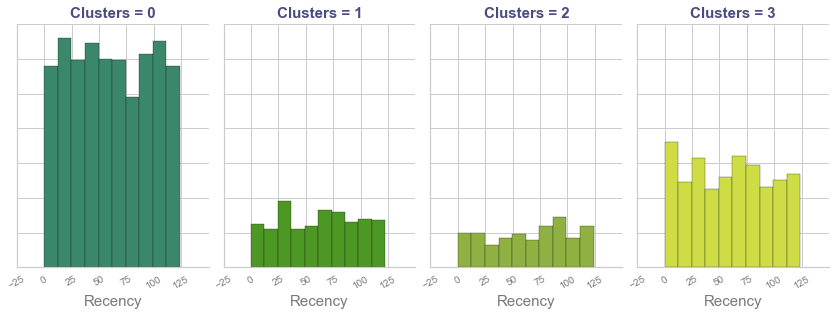

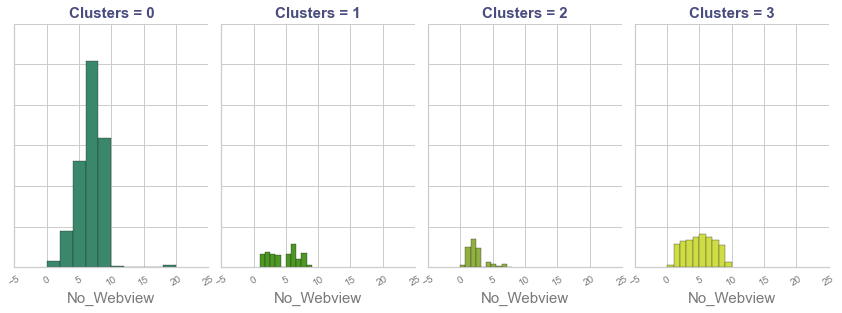

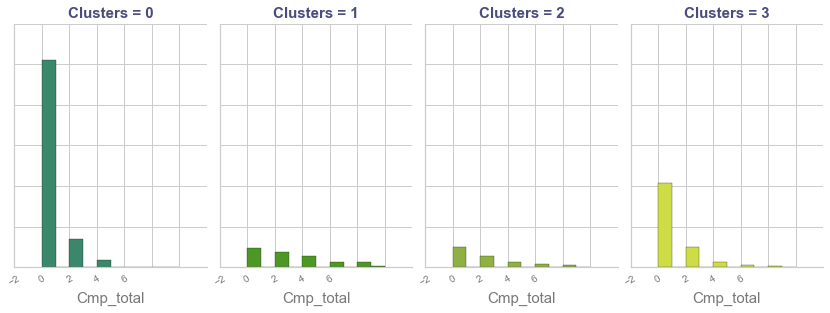

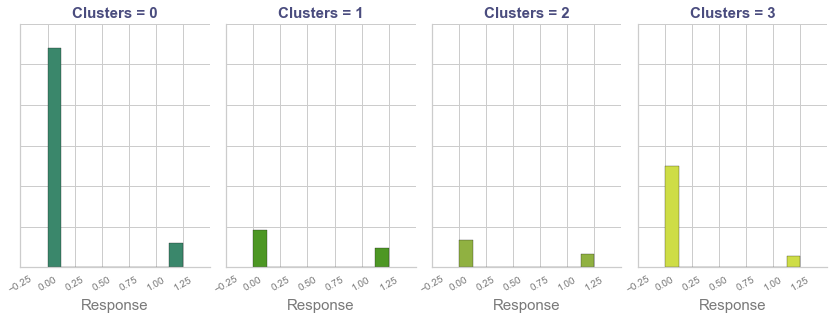

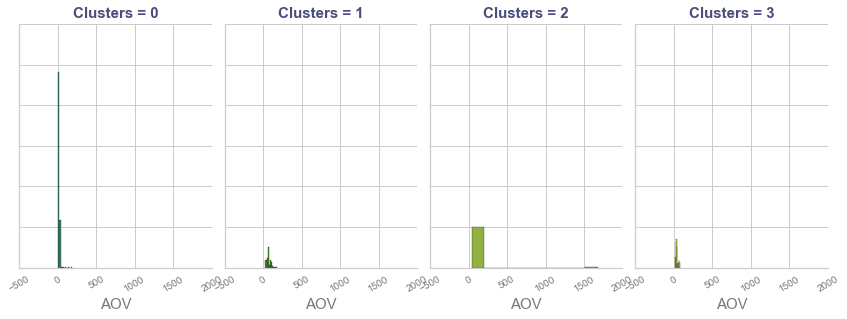

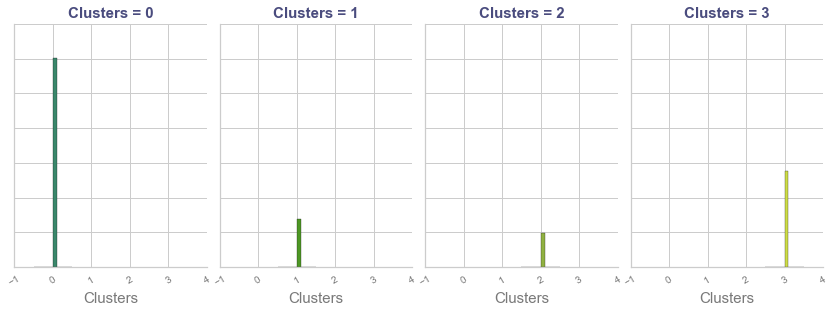

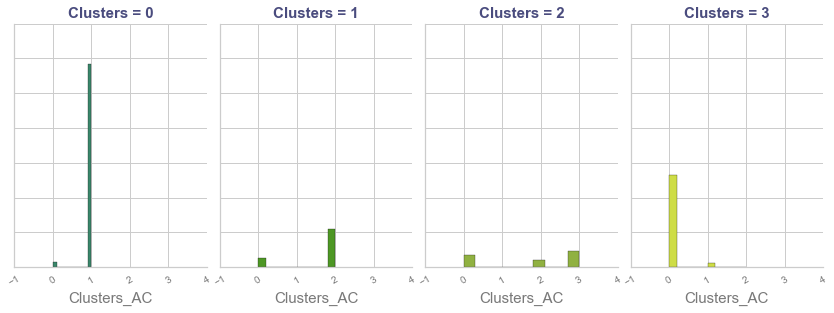

In [86]:
for i in X:
    g = sns.FacetGrid(X, col = "Clusters", hue = "Clusters", palette = pal)
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = '#797979')
    g.set_yticklabels(color = '#797979')
    g.set_xlabels(size=15, color = '#797979')
    g.set_titles(size=15, color = '#4A4C7E', fontweight="bold")
    g.fig.set_figheight(5)

In [87]:
pd.options.display.float_format = "{:.0f}".format
summary=X[['Income', 'Clusters']]
summary.set_index("Clusters", inplace = True)
summary=summary.groupby('Clusters').describe().transpose()
summary.head()

Clusters         0     1     2     3
Income count  1202   277   199   554
       mean  37218 73231 78187 63658
       std   14557 11157 14283 11264
       min    1730 44802  2447 30538
       25%   27214 65176 70922 55770

In [88]:
pd.options.display.float_format = "{:.0f}".format
summary=X[['Spending','Clusters']]
summary.set_index("Clusters", inplace = True)
summary=summary.groupby('Clusters').describe().transpose()
summary.head()

Clusters          0    1    2   3
Spending count 1202  277  199 554
         mean   142 1532 1532 822
         std    145  352  323 251
         min      8  906  925 363
         25%     43 1245 1276 612

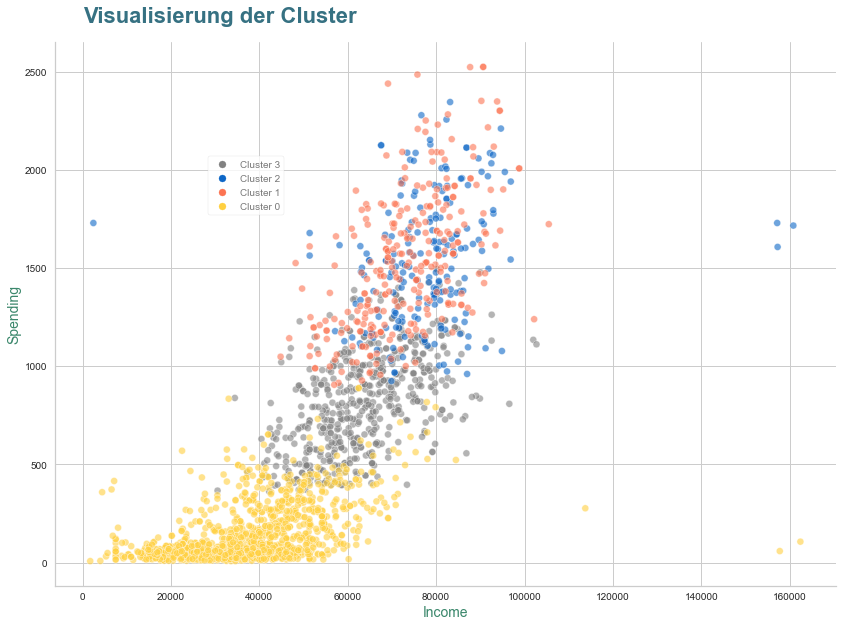

In [89]:
# Vorbereitung eines Scatterplots der Cluster 
# Erstellen eines neuen Dataframes
clusters_incomes = X[['Income', 'Spending', 'Clusters']
                     ]

# Erstellen einer neuen Variable
clusters_incomes['group'] = clusters_incomes['Clusters']

# Ändern des Datentyps
clusters_incomes['group'] = clusters_incomes['group'].astype(
    str)

# Änderung der Bezeichnungen
clusters_incomes['group'] = clusters_incomes['group'].str.replace(
    '0', 'Cluster 0')
clusters_incomes['group'] = clusters_incomes['group'].str.replace(
    '1', 'Cluster 1')
clusters_incomes['group'] = clusters_incomes['group'].str.replace(
    '2', 'Cluster 2')
clusters_incomes['group'] = clusters_incomes['group'].str.replace(
    '3', 'Cluster 3')

# Sortieren der Daten
clusters_incomes = clusters_incomes.sort_values(
    'group', ascending=False)     

# Farbgebung
pallet = ["#828282", "#0e67c7", "#fc7452", "#ffd040"]

# Visualisierung
fig, ax = plt.subplots(figsize=(14, 10))

sns.scatterplot(data=clusters_incomes, x='Income', y='Spending',
                hue='group', palette=pallet, alpha=0.6)

# Benennung der Achsen
plt.xlabel('Income', color='#3A876B', size=14)
plt.ylabel('Spending', color='#3A876B', size=14)

# Titel
plt.text(0, 2750, "Visualisierung der Cluster", size=22, color="#367182", fontweight="bold")

#Legende
plt.legend(labelcolor = '#797979', frameon=True, bbox_to_anchor=(0.30, 0.8))

# Verstecken der oberen sowie rechten Achse
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Zur besseren Abgrenzung der einzelnen Cluster zueinonder wurde hier ein abweichendes Farbmodell gewählt.

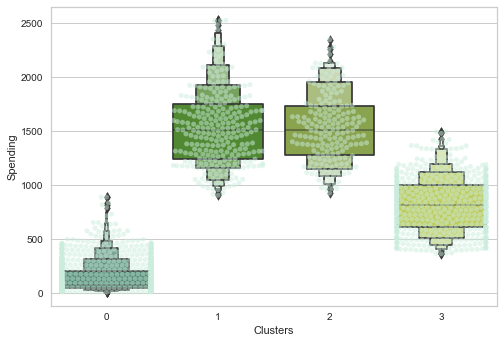

In [90]:
# Darstellung der Verteilung der Ausgaben je Cluster im Boxplot
pl = sns.swarmplot(x=X["Clusters"], y=X["Spending"],
                   color="#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x=X["Clusters"], y=X["Spending"], palette=pal)

<div class="alert alert-block alert-success">
<b>Zusammenfassung:</b><br>
- In diesem Abschnitt wurde das gewählte Clustering-Modell beschrieben und die Wahl begründet, inklusive der Vor- und Nachteile und der Voraussetzungen. <br>
- Es wurde mit Hilfe der Elbow-Method die geeignete Anzahl an Clustern bestimmt und ein K-Means Clustering durchgeführt. <br>
- Die Ergebnisse aus dem Clustering wurden visualisert und Interpretationen der Ergebnisse vorgenommen.
    </div>

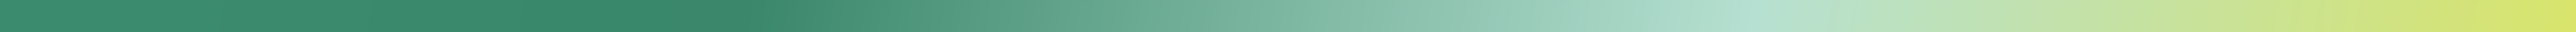

## 5. Ergebnisdokumentation & Schlussbetrachtungen <a class="anchor" id="5. Ergebnisdokumentation & Schlussbetrachtungen"></a>

Checkliste für den Abschnitt "Ergebnisdokumentation & Schlussbetrachtungen":

- [x] Die Ergebnisse des Clustering werden dargelegt, bewertet und Handlungsempfehlungen abgeleitet
- [x] Es werden Limitationen, Optimierungspotenziale beleuchtet
- [x] Die Datenanalyse schließt mit einem kurzen Fazit

### 5.1 Ergebnisse <a class="anchor" id="5.1 Ergebnisse"></a>

**Profiling**

- Da die Cluster gebildet und die Kaufgewohnheiten analysiert sind, gilt es abschließend zu untersuchen, wer zu welchem Cluster gehört. Dazu wird ein Profil der jeweiligen Cluster erstellt und eine Schlussfolgerung gezogen, wer unsere Star-Kunden sind und daher mehr Aufmerksamkeit vom Marketingteam bekommen sollten.

- Um dies zu entscheiden, werden einige der Merkmale, die für die persönlichen Eigenschaften des Kunden kennzeichnend sind, anhand der Cluster-Zugehörigkeit analysiert. Auf Grundlage der Ergebnisse werden dann die Schlussfolgerungen gezogen und Handlungsempfehlungen gegeben. 

In [91]:
# Überblick über die einzelnen Dimensionen je Cluster
clusterstat = X.groupby(X["Clusters"]).mean()
clusterstat

,Age,Marital_Status,Minors,Has_child,Family_size,Income,Education,D_engaged,Wine,Fruits,...,CatBuy,StoreBuy,Deals,TotalNumPurch,Recency,No_Webview,Cmp_total,Response,AOV,Clusters_AC
Clusters,,,,,,,,,,,,,,,,,,,,,
0,44,1,1,1,3,37218,0,518,58,8,...,1,4,2,9,49,6,0,0,13,1
1,49,1,1,0,2,73231,0,609,980,45,...,6,9,2,22,50,5,1,0,72,2
2,45,1,0,0,2,78187,0,573,521,70,...,7,8,1,21,52,2,1,0,84,2
3,49,1,1,1,3,63658,0,542,424,41,...,4,8,3,21,48,5,0,0,40,0


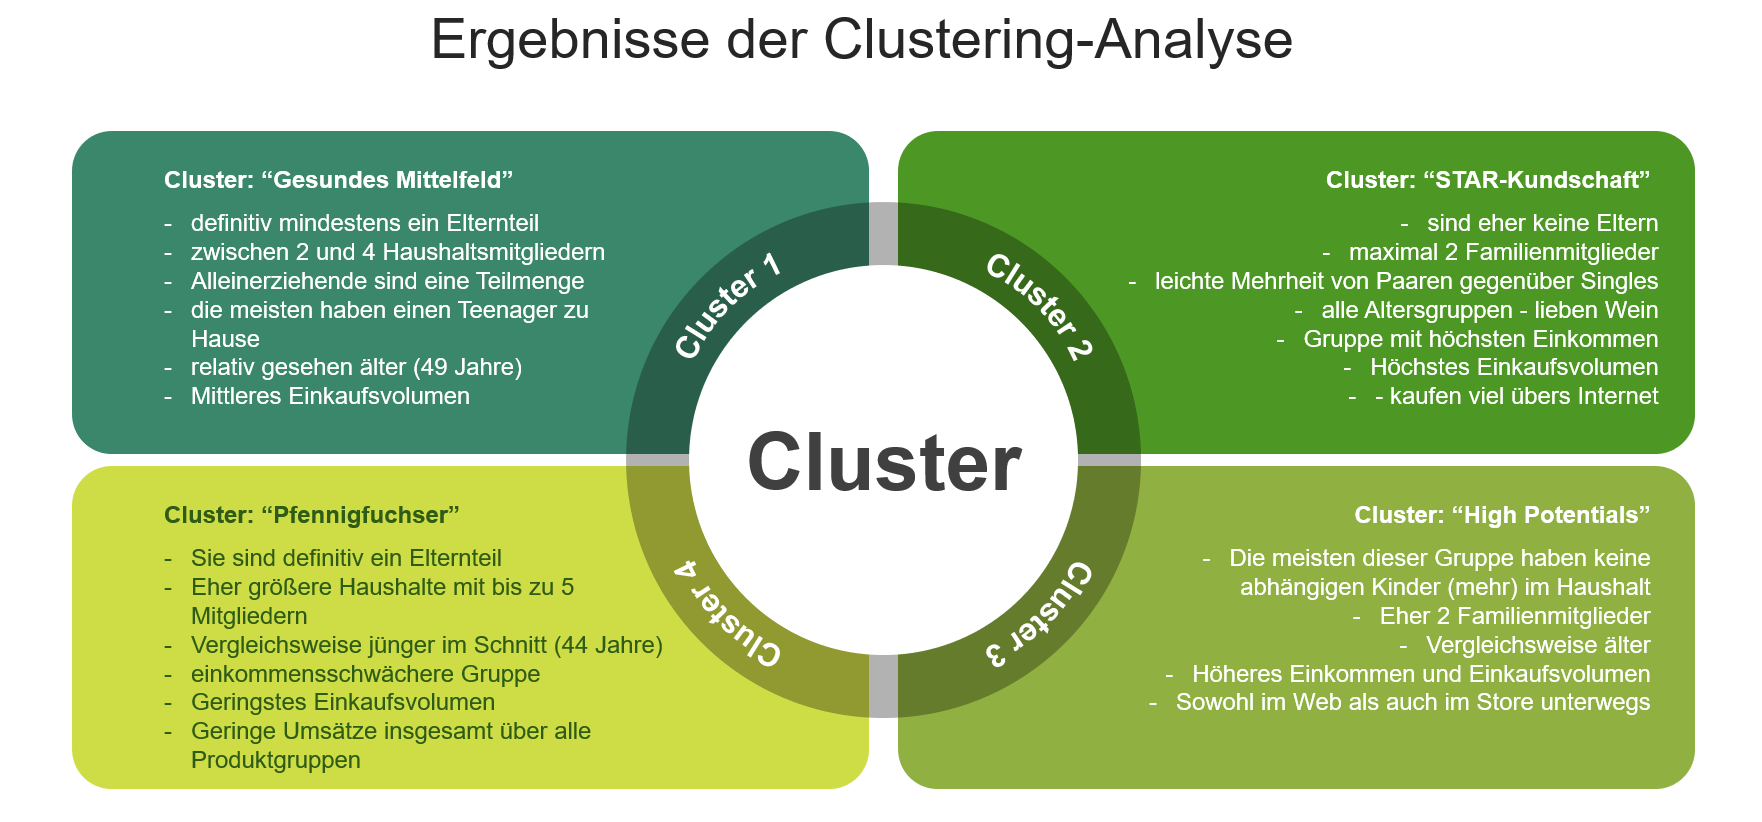

In [92]:
display.Image("./misc/Clusters_results.png")

- Unser Ziel sollte es sein, dass Cluster mit den Star-Kunden stärker zu fokussieren. Diese haben die höchsten Umsätze und die stärkste Kaufkraft. 

- Die Star-Kunden geben gerne Geld für Wein aus. Dieses Potential sollten wir stärker nutzen.

- Der Donnerstag ist der Wochentag, an welchem die meisten Neukunden in das Unternehmen kommen. Um das weiter zu forcieren, könnte man an diesem Tag besonders viel Werbung schalten.

- Die Sommermonate Juli und August sind ebenfalls starke Monate, was die Neukundengewinnung angeht. Vielleicht hilft ein Sommerfest oder eine Sommer-Rabatt-Aktion dies noch mehr zu fördern.

- Es gibt ein Cluster mit "High Potentials" die sich zur Star-Kundschaft entwickeln könnten. Dies sollte gezielt mit Marketingaktionen herbeigeführt werden. Wege dahin sind Teil des Ausblicks.

----

### 5.2 Limitationen & Ausblick <a class="anchor" id="5.2 Limitationen & Ausblick"></a>

Das Clustering ist gut gelungen. Dennoch gäbe es noch weiteres **Optimierungspotenzial**. So wurde in diesem Projekt keine Dimensionsreduktion durchgeführt. Diese wurde in der Data Analytics Vorlesung zwar kurz angesprochen, aber nicht im Detail behandelt und somit aus diesem Projekt exkludiert. Eine erste Recherche und ein kurzer Implementierungsversuch hat die Erkenntnis geliefert, dass die Nutzung zum Beispiel der Principal component analysis (PCA) Technik [12] die Clustering-Ergebnisse weiter hätte verbessern können. Dabei handelt es sich um ein unüberwachtes statistisches Verfahren zur Dimensionsreduktion. Es kombiniert die korrelierten Merkmale, erzeugt die gleiche Anzahl von Merkmalen, die nicht miteinander korreliert sind und komprimiert den Großteil der Informationen (Varianz) in den ersten Komponenten. Dies würde helfen, die Multikollinearität zu behandeln, welches ggf. Machine Learning-Modelle negativ beeinflusst. Zudem war dieser Dataframe mit sehr vielen Features (>20) wohlmöglich nicht ideal, um ein K-Means Clustering durchzuführen.

Darüberhinaus gibt es nicht unbedingt viele Informationen und Details zum hier genutzten Dataset "marketing_campaign". So gibt es insbesondere weder zum Kontext der Datenerhebung noch zu Details des dahinterstehenden Unternehmens und deren Produkten genaue Informationen [13]. Besser verstehen zu können, welches Unternehmen zum Beispiel sowohl Früchte und Fisch, als auch Gold-Produkte im Sortiment hat und wie diese Diversifikation zustande kam, wäre eine wertvolle Erkenntnis.

Als **Ausblick** sollte das Unternehmen die Daten weiter möglichst genau erheben, um damit die Marketingkampagnen, Rabattaktionen, Produktentwicklungen und Kundenansprachen bestmöglich steuern und optimieren zu können. Zudem könnten neben dem K-Means Clustering zukünftig noch ergänzende Clustering-Techniken etabliert sowie eine Dimensionsreduktion angewandt werden. Weiter könnten noch mehr Features und KPIs gebildet werden, zum Beispiel das "Average Order Volume" als Verhältnis von `Expaneses` zu `TotalNumPurch`. Spannend wären zudem die weitere Nutzung der Monate oder Wochentage mit den meisten Neukunden aus `DtCustomer`, um anhand dessen die Marketingsakivitäten noch gezielter zu steuern. Zum Beispiel gezielt an diesen Wochentagen Werbung schalten oder eine Sommeraktion veranstalten, um noch mehr Neukunden zu generieren.

### 5.3 Fazit <a class="anchor" id="5.3 Fazit"></a>

Wie einleitend in diesem Projekt erwähnt ist unsere Vision **"glückliche & zufriedene Kunden!"**. Um dieses Ziel zu erreichen, ist es unser Anspruch, unsere unterschiedlichen Kundensegmente personalisiert anzusprechen. Unsere Mission ist es, auf die individuellen Bedürfnisse unserer Kundschaft einzugehen und so ein langfristiges Vertrauensverhältnis aufzubauen.

Damit dies gelingt, wurde in diesem Projekt eine unsupervised learning Technik namens K-Means Clustering angewandt. Als Endresultat konnten 4 Cluster, also 4 ähnliche Kundensegmente identifiziert werden. Die Einteilung der Kunden in die Cluster basiert dabei auf vielen unterschiedlichen Merkmalen, wie die Familienstruktur, dem Einkommen, den Ausgaben sowie dem generellen Kaufverhalten. Diese Kundensegmentierung kann zukünftig als Basis für die verbesserte Planung unserer Marketingstrategien genutzt werden. Einige Ansätze und Vorschläge wurden mit dieser Arbeit gemacht. 

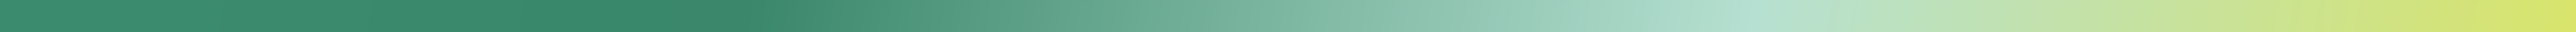

## 6. Quellenangaben <a class="anchor" id="6. Quellenangaben"></a>

**Quellen**

- [1] https://statstic.com/advertising-revenue-of-facebook-and-google-compared/ (Ad revenues Google & Meta)
- [2] https://www.datascience-pm.com/crisp-dm-2/ (CRISP-DM)
- [3] https://scikit-learn.org/stable/modules/clustering.html#inertia (skicit learn - K-Means clustering Intertia)
- [4] https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis (Quelle des Dataset)
- [5] https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb (tds - Customer Segmentation)
- [6] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (scikit-learn Dokumentation zum StandardScaler)
- [7] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html (scikit-learn Dokumentation zum K-Means Clustering)
- [8] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html (skicit learn - Agglomerative Clustering Dokumentation)
- [9] https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/ (In-depth Intuition of K-Means Clustering Algorithm in Machine Learning)
- [10] https://tinyurl.com/ynmem6ju (Abschätzung der Qualität des Clusterns mit Silhouette Scores)
- [11] https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ (StandardScaler und MinMaxScaler)
- [12] https://tinyurl.com/3j9xhy3p (Principal component analysis - PCA)
- [13] https://scholarworks.csun.edu/bitstream/handle/10211.3/222270/Pachchigar-Snehi-thesis-2022.pdf?sequence=1 (Customer Personality Exploratory Data Analysis -  Master-Thesis, California State University)

----

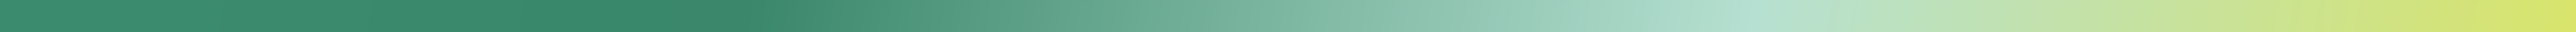

**Vielen Dank für's Lesen der Projektarbeit & alles Gute :-)**

> Frankfurt am Main, 16.09.2022